# **scScope**

#Data : Mouse (Mus musculus) brain cells
sepcifications: [Tabula Muris](https://https://tabula-muris.ds.czbiohub.org/)
                scRNA seq of Brain tissue of mouse

implementation pipeline of scScope model from scdeep package
The pipline consists of the foloowing :
* Loading the data and building a AnnData from the counts data and metadata
* Preprocessing(quality filtering) and training the scScope model
* Comapring the quality of data before and after the application of model
* Down stream Analysis - PCA, UMAP, Clustering analysis
* Additional visualizations





In [1]:
!pip install scdeep

In [2]:
!pip install -q scanpy
!pip install -q phenograph

     |████████████████████████████████| 7.2MB 4.4MB/s 
     |████████████████████████████████| 122kB 58.7MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 163kB 5.5MB/s 
     |████████████████████████████████| 2.4MB 12.1MB/s 
     |████████████████████████████████| 3.2MB 45.0MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
cd 'drive/My Drive/BL uploads'

/content/drive/My Drive/BL uploads


In [5]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import torch
from sklearn.cluster import KMeans
import seaborn as sns
%matplotlib inline 
import scdeep 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
count_dataframe = pd.read_csv('brain_counts.csv', index_col=0) 

In [7]:
metadata_dataframe = pd.read_csv('brain_metadata.csv', index_col=0)

#Constructing AnnData using the two csv files


In [14]:
adata = sc.AnnData(X = count_dataframe, obs = metadata_dataframe)

In [15]:
adata.X #expression matrix

array([[  0., 125.,  16., ...,   0.,  54.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0., 348.,   0., ...,   0., 113.,   0.],
       ...,
       [  0., 135.,  41., ...,   0.,  45.,   0.],
       [  0., 129.,  54., ...,   0.,  57.,   0.],
       [  0.,   1.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [16]:
#import phenograph
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score


-----
#Filtering out only the top 1000 highly expressed genes

In [17]:
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=1000, subset=True)
gene_expression = adata.copy()
gene_expression = gene_expression.X

In [18]:
gene_expression.shape

(3401, 999)

In [19]:
from scdeep import scScope

In [20]:
gene_expression_dataset = scdeep.dataset.GeneExpressionDataset()
gene_expression_dataset.from_data(gene_expression)


----
Initailising the model and training it on "adata"

In [28]:
model = scScope.scScope(gene_expression_dataset.data, [], [], 50, exp_batch_input=[])
trainer = scScope.scScopeTrainer(model, gene_expression_dataset, batch_size=64)

training:   1%|          | 1/100 [00:00<00:19,  5.10it/s]

latent_layer.linear.weight torch.Size([50, 999])
latent_layer.linear.bias torch.Size([50])
output_layer.linear.weight torch.Size([999, 50])
output_layer.linear.bias torch.Size([999])
batch_effect_layer.weight torch.Size([999, 1])
imputation_model.0.linear.weight torch.Size([64, 999])
imputation_model.0.linear.bias torch.Size([64])
imputation_model.1.linear.weight torch.Size([999, 64])
imputation_model.1.linear.bias torch.Size([999])

Epoch: 1

Iteration: 0 Loss: 740.9862
Iteration: 1 Loss: 780.2321
Iteration: 2 Loss: 683.6232
Iteration: 3 Loss: 738.8015
Iteration: 4 Loss: 719.2146
Iteration: 5 Loss: 737.6060
Iteration: 6 Loss: 707.5546
Iteration: 7 Loss: 693.9092
Iteration: 8 Loss: 766.3530
Iteration: 9 Loss: 788.9058
Iteration: 10 Loss: 701.7539
Iteration: 11 Loss: 716.2186
Iteration: 12 Loss: 691.0914
Iteration: 13 Loss: 754.4745
Iteration: 14 Loss: 699.1620
Iteration: 15 Loss: 732.6359
Iteration: 16 Loss: 777.0786
Iteration: 17 Loss: 691.3245
Iteration: 18 Loss: 746.1885
Iteration: 

training:   2%|▏         | 2/100 [00:00<00:19,  5.08it/s]


Epoch: 2

Iteration: 0 Loss: 736.4138
Iteration: 1 Loss: 743.5697
Iteration: 2 Loss: 674.5454
Iteration: 3 Loss: 663.5919
Iteration: 4 Loss: 702.4264
Iteration: 5 Loss: 660.3044
Iteration: 6 Loss: 678.8547
Iteration: 7 Loss: 629.5445
Iteration: 8 Loss: 710.9923
Iteration: 9 Loss: 670.4338
Iteration: 10 Loss: 669.7848
Iteration: 11 Loss: 653.7101
Iteration: 12 Loss: 659.3796
Iteration: 13 Loss: 699.4858
Iteration: 14 Loss: 623.3483
Iteration: 15 Loss: 677.8223
Iteration: 16 Loss: 696.7037
Iteration: 17 Loss: 697.3586
Iteration: 18 Loss: 706.9690
Iteration: 19 Loss: 710.0923
Iteration: 20 Loss: 629.6386
Iteration: 21 Loss: 680.4528
Iteration: 22 Loss: 699.2589
Iteration: 23 Loss: 674.9436
Iteration: 24 Loss: 659.0178
Iteration: 25 Loss: 711.6642
Iteration: 26 Loss: 725.3865
Iteration: 27 Loss: 702.0548
Iteration: 28 Loss: 639.9193
Iteration: 29 Loss: 655.7664
Iteration: 30 Loss: 617.9635
Iteration: 31 Loss: 661.1360
Iteration: 32 Loss: 618.8459
Iteration: 33 Loss: 695.9169
Iteration: 34

training:   3%|▎         | 3/100 [00:00<00:19,  5.03it/s]

Iteration: 0 Loss: 714.8384
Iteration: 1 Loss: 637.6000
Iteration: 2 Loss: 597.6119
Iteration: 3 Loss: 645.9983
Iteration: 4 Loss: 665.1473
Iteration: 5 Loss: 634.4034
Iteration: 6 Loss: 629.7908
Iteration: 7 Loss: 612.1331
Iteration: 8 Loss: 747.4264
Iteration: 9 Loss: 603.1038
Iteration: 10 Loss: 693.4997
Iteration: 11 Loss: 657.0022
Iteration: 12 Loss: 683.4680
Iteration: 13 Loss: 673.2144
Iteration: 14 Loss: 676.7136
Iteration: 15 Loss: 687.4077
Iteration: 16 Loss: 674.8191
Iteration: 17 Loss: 624.5861
Iteration: 18 Loss: 653.2216
Iteration: 19 Loss: 644.1597
Iteration: 20 Loss: 648.7653
Iteration: 21 Loss: 657.5811
Iteration: 22 Loss: 617.5355
Iteration: 23 Loss: 648.7126
Iteration: 24 Loss: 664.4976
Iteration: 25 Loss: 638.3039
Iteration: 26 Loss: 600.2794
Iteration: 27 Loss: 576.5616
Iteration: 28 Loss: 596.2858
Iteration: 29 Loss: 666.6020
Iteration: 30 Loss: 625.3647
Iteration: 31 Loss: 610.1274
Iteration: 32 Loss: 631.6674
Iteration: 33 Loss: 650.1213
Iteration: 34 Loss: 661.

training:   4%|▍         | 4/100 [00:00<00:19,  5.00it/s]

Iteration: 0 Loss: 630.2590
Iteration: 1 Loss: 636.7136
Iteration: 2 Loss: 593.9919
Iteration: 3 Loss: 650.5748
Iteration: 4 Loss: 634.9343
Iteration: 5 Loss: 632.2642
Iteration: 6 Loss: 595.9667
Iteration: 7 Loss: 603.6594
Iteration: 8 Loss: 668.6546
Iteration: 9 Loss: 643.7081
Iteration: 10 Loss: 616.6946
Iteration: 11 Loss: 622.9458
Iteration: 12 Loss: 623.9154
Iteration: 13 Loss: 618.1597
Iteration: 14 Loss: 597.5074
Iteration: 15 Loss: 605.1230
Iteration: 16 Loss: 607.5173
Iteration: 17 Loss: 594.9716
Iteration: 18 Loss: 610.9014
Iteration: 19 Loss: 613.7150
Iteration: 20 Loss: 593.1791
Iteration: 21 Loss: 603.8901
Iteration: 22 Loss: 618.6998
Iteration: 23 Loss: 634.4116
Iteration: 24 Loss: 626.1228
Iteration: 25 Loss: 603.7922
Iteration: 26 Loss: 644.6356
Iteration: 27 Loss: 575.7243
Iteration: 28 Loss: 573.4571
Iteration: 29 Loss: 582.3766
Iteration: 30 Loss: 591.7523
Iteration: 31 Loss: 645.1243
Iteration: 32 Loss: 573.4275
Iteration: 33 Loss: 632.1957
Iteration: 34 Loss: 613.

training:   5%|▌         | 5/100 [00:01<00:19,  4.85it/s]

Iteration: 1 Loss: 631.5491
Iteration: 2 Loss: 607.1383
Iteration: 3 Loss: 560.7891
Iteration: 4 Loss: 546.7863
Iteration: 5 Loss: 601.0297
Iteration: 6 Loss: 590.7076
Iteration: 7 Loss: 616.2195
Iteration: 8 Loss: 565.8260
Iteration: 9 Loss: 611.3380
Iteration: 10 Loss: 585.5427
Iteration: 11 Loss: 576.3190
Iteration: 12 Loss: 559.1913
Iteration: 13 Loss: 592.7798
Iteration: 14 Loss: 592.0256
Iteration: 15 Loss: 590.0164
Iteration: 16 Loss: 562.1514
Iteration: 17 Loss: 553.2997
Iteration: 18 Loss: 575.7034
Iteration: 19 Loss: 624.0466
Iteration: 20 Loss: 543.8119
Iteration: 21 Loss: 585.2753
Iteration: 22 Loss: 566.6324
Iteration: 23 Loss: 555.3029
Iteration: 24 Loss: 568.5591
Iteration: 25 Loss: 550.6099
Iteration: 26 Loss: 596.3198
Iteration: 27 Loss: 568.2039
Iteration: 28 Loss: 550.1568
Iteration: 29 Loss: 584.9365
Iteration: 30 Loss: 607.2305
Iteration: 31 Loss: 563.9544
Iteration: 32 Loss: 594.3636
Iteration: 33 Loss: 575.7046
Iteration: 34 Loss: 558.0552
Iteration: 35 Loss: 580

training:   6%|▌         | 6/100 [00:01<00:19,  4.81it/s]

Iteration: 0 Loss: 592.4550
Iteration: 1 Loss: 538.5771
Iteration: 2 Loss: 575.3933
Iteration: 3 Loss: 529.5387
Iteration: 4 Loss: 508.2465
Iteration: 5 Loss: 504.8398
Iteration: 6 Loss: 507.9307
Iteration: 7 Loss: 539.1669
Iteration: 8 Loss: 581.1606
Iteration: 9 Loss: 583.5155
Iteration: 10 Loss: 594.6628
Iteration: 11 Loss: 558.1536
Iteration: 12 Loss: 559.7877
Iteration: 13 Loss: 554.8301
Iteration: 14 Loss: 586.7561
Iteration: 15 Loss: 511.2897
Iteration: 16 Loss: 565.3842
Iteration: 17 Loss: 547.1526
Iteration: 18 Loss: 513.8864
Iteration: 19 Loss: 560.1896
Iteration: 20 Loss: 514.7782
Iteration: 21 Loss: 578.3015
Iteration: 22 Loss: 587.9164
Iteration: 23 Loss: 527.7086
Iteration: 24 Loss: 488.6120
Iteration: 25 Loss: 527.7913
Iteration: 26 Loss: 556.6688
Iteration: 27 Loss: 558.7537
Iteration: 28 Loss: 549.7769
Iteration: 29 Loss: 501.1380
Iteration: 30 Loss: 536.4260
Iteration: 31 Loss: 536.5985
Iteration: 32 Loss: 556.4070
Iteration: 33 Loss: 526.7808
Iteration: 34 Loss: 549.

training:   7%|▋         | 7/100 [00:01<00:19,  4.84it/s]

Iteration: 0 Loss: 526.3909
Iteration: 1 Loss: 573.1895
Iteration: 2 Loss: 481.6302
Iteration: 3 Loss: 534.2171
Iteration: 4 Loss: 499.5705
Iteration: 5 Loss: 505.4848
Iteration: 6 Loss: 527.3988
Iteration: 7 Loss: 508.1081
Iteration: 8 Loss: 537.8124
Iteration: 9 Loss: 557.0596
Iteration: 10 Loss: 514.3203
Iteration: 11 Loss: 564.8333
Iteration: 12 Loss: 528.6684
Iteration: 13 Loss: 510.3253
Iteration: 14 Loss: 510.2720
Iteration: 15 Loss: 592.8684
Iteration: 16 Loss: 488.3946
Iteration: 17 Loss: 534.0203
Iteration: 18 Loss: 556.5354
Iteration: 19 Loss: 540.1113
Iteration: 20 Loss: 511.2021
Iteration: 21 Loss: 550.7396
Iteration: 22 Loss: 547.0507
Iteration: 23 Loss: 509.2455
Iteration: 24 Loss: 491.8104
Iteration: 25 Loss: 565.9067
Iteration: 26 Loss: 510.2510
Iteration: 27 Loss: 492.5542
Iteration: 28 Loss: 484.4890
Iteration: 29 Loss: 506.4251
Iteration: 30 Loss: 519.6660
Iteration: 31 Loss: 522.5291
Iteration: 32 Loss: 458.2844
Iteration: 33 Loss: 468.2369
Iteration: 34 Loss: 503.

training:   8%|▊         | 8/100 [00:01<00:18,  4.86it/s]

Iteration: 1 Loss: 533.8030
Iteration: 2 Loss: 503.4235
Iteration: 3 Loss: 505.2618
Iteration: 4 Loss: 464.4139
Iteration: 5 Loss: 502.5711
Iteration: 6 Loss: 516.5701
Iteration: 7 Loss: 494.7047
Iteration: 8 Loss: 503.9651
Iteration: 9 Loss: 484.5558
Iteration: 10 Loss: 469.3991
Iteration: 11 Loss: 519.1848
Iteration: 12 Loss: 479.0815
Iteration: 13 Loss: 507.3827
Iteration: 14 Loss: 505.2456
Iteration: 15 Loss: 498.3643
Iteration: 16 Loss: 496.7668
Iteration: 17 Loss: 466.0308
Iteration: 18 Loss: 519.7999
Iteration: 19 Loss: 545.4088
Iteration: 20 Loss: 505.1282
Iteration: 21 Loss: 509.0335
Iteration: 22 Loss: 509.8375
Iteration: 23 Loss: 475.9844
Iteration: 24 Loss: 510.8552
Iteration: 25 Loss: 512.8723
Iteration: 26 Loss: 495.6544
Iteration: 27 Loss: 505.7189
Iteration: 28 Loss: 509.7265
Iteration: 29 Loss: 516.8102
Iteration: 30 Loss: 452.7391
Iteration: 31 Loss: 505.5877
Iteration: 32 Loss: 507.0664
Iteration: 33 Loss: 474.1620
Iteration: 34 Loss: 460.9107
Iteration: 35 Loss: 487

training:   9%|▉         | 9/100 [00:01<00:18,  4.92it/s]

Iteration: 2 Loss: 501.9556
Iteration: 3 Loss: 454.2971
Iteration: 4 Loss: 476.3775
Iteration: 5 Loss: 456.0189
Iteration: 6 Loss: 522.4399
Iteration: 7 Loss: 496.0909
Iteration: 8 Loss: 481.3038
Iteration: 9 Loss: 490.7576
Iteration: 10 Loss: 465.2205
Iteration: 11 Loss: 493.1440
Iteration: 12 Loss: 545.4574
Iteration: 13 Loss: 484.1313
Iteration: 14 Loss: 457.3161
Iteration: 15 Loss: 500.1945
Iteration: 16 Loss: 477.4340
Iteration: 17 Loss: 478.2626
Iteration: 18 Loss: 456.5208
Iteration: 19 Loss: 483.9103
Iteration: 20 Loss: 506.7008
Iteration: 21 Loss: 459.2255
Iteration: 22 Loss: 532.1882
Iteration: 23 Loss: 502.7011
Iteration: 24 Loss: 464.8629
Iteration: 25 Loss: 485.7702
Iteration: 26 Loss: 463.9389
Iteration: 27 Loss: 450.5603
Iteration: 28 Loss: 464.8970
Iteration: 29 Loss: 453.1057
Iteration: 30 Loss: 450.4902
Iteration: 31 Loss: 505.8672
Iteration: 32 Loss: 484.1331
Iteration: 33 Loss: 422.8209
Iteration: 34 Loss: 500.3478
Iteration: 35 Loss: 449.1576
Iteration: 36 Loss: 47

training:  10%|█         | 10/100 [00:02<00:18,  4.87it/s]

Iteration: 4 Loss: 471.9450
Iteration: 5 Loss: 476.3730
Iteration: 6 Loss: 461.7646
Iteration: 7 Loss: 463.4319
Iteration: 8 Loss: 425.6215
Iteration: 9 Loss: 487.1966
Iteration: 10 Loss: 463.6930
Iteration: 11 Loss: 475.7163
Iteration: 12 Loss: 471.5445
Iteration: 13 Loss: 491.7184
Iteration: 14 Loss: 461.1486
Iteration: 15 Loss: 465.1800
Iteration: 16 Loss: 436.2126
Iteration: 17 Loss: 500.5579
Iteration: 18 Loss: 484.5963
Iteration: 19 Loss: 468.2939
Iteration: 20 Loss: 462.3863
Iteration: 21 Loss: 484.0377
Iteration: 22 Loss: 451.4025
Iteration: 23 Loss: 432.0446
Iteration: 24 Loss: 488.7070
Iteration: 25 Loss: 473.0593
Iteration: 26 Loss: 445.5764
Iteration: 27 Loss: 451.8579
Iteration: 28 Loss: 470.5901
Iteration: 29 Loss: 470.7950
Iteration: 30 Loss: 444.2160
Iteration: 31 Loss: 426.1441
Iteration: 32 Loss: 454.0679
Iteration: 33 Loss: 452.2311
Iteration: 34 Loss: 472.1743
Iteration: 35 Loss: 474.8430
Iteration: 36 Loss: 459.2054
Iteration: 37 Loss: 459.9171
Iteration: 38 Loss: 

training:  11%|█         | 11/100 [00:02<00:18,  4.93it/s]

Iteration: 3 Loss: 434.7531
Iteration: 4 Loss: 505.6827
Iteration: 5 Loss: 464.5973
Iteration: 6 Loss: 460.7549
Iteration: 7 Loss: 441.8250
Iteration: 8 Loss: 489.7847
Iteration: 9 Loss: 440.9125
Iteration: 10 Loss: 442.8258
Iteration: 11 Loss: 446.6567
Iteration: 12 Loss: 441.0057
Iteration: 13 Loss: 446.5595
Iteration: 14 Loss: 461.8644
Iteration: 15 Loss: 407.1053
Iteration: 16 Loss: 484.0963
Iteration: 17 Loss: 444.1335
Iteration: 18 Loss: 464.8545
Iteration: 19 Loss: 464.2025
Iteration: 20 Loss: 424.0178
Iteration: 21 Loss: 464.7880
Iteration: 22 Loss: 430.8027
Iteration: 23 Loss: 463.3334
Iteration: 24 Loss: 445.3581
Iteration: 25 Loss: 475.0180
Iteration: 26 Loss: 438.4957
Iteration: 27 Loss: 483.7163
Iteration: 28 Loss: 457.7186
Iteration: 29 Loss: 429.3610
Iteration: 30 Loss: 464.5458
Iteration: 31 Loss: 448.3889
Iteration: 32 Loss: 465.4986
Iteration: 33 Loss: 470.3195
Iteration: 34 Loss: 450.1458
Iteration: 35 Loss: 448.5937
Iteration: 36 Loss: 462.6595
Iteration: 37 Loss: 4

training:  12%|█▏        | 12/100 [00:02<00:17,  4.96it/s]

Iteration: 5 Loss: 433.1223
Iteration: 6 Loss: 446.2524
Iteration: 7 Loss: 444.1923
Iteration: 8 Loss: 425.5353
Iteration: 9 Loss: 434.9813
Iteration: 10 Loss: 443.2188
Iteration: 11 Loss: 408.4789
Iteration: 12 Loss: 452.1224
Iteration: 13 Loss: 443.3080
Iteration: 14 Loss: 460.1926
Iteration: 15 Loss: 442.8178
Iteration: 16 Loss: 436.6349
Iteration: 17 Loss: 441.1989
Iteration: 18 Loss: 466.1591
Iteration: 19 Loss: 454.0848
Iteration: 20 Loss: 465.3849
Iteration: 21 Loss: 416.6608
Iteration: 22 Loss: 431.6769
Iteration: 23 Loss: 456.7530
Iteration: 24 Loss: 431.1161
Iteration: 25 Loss: 465.0838
Iteration: 26 Loss: 445.0170
Iteration: 27 Loss: 462.6347
Iteration: 28 Loss: 438.8963
Iteration: 29 Loss: 427.3302
Iteration: 30 Loss: 419.3272
Iteration: 31 Loss: 399.5356
Iteration: 32 Loss: 481.1969
Iteration: 33 Loss: 446.8423
Iteration: 34 Loss: 439.0159
Iteration: 35 Loss: 451.4345
Iteration: 36 Loss: 437.7071
Iteration: 37 Loss: 432.0811
Iteration: 38 Loss: 443.5208
Iteration: 39 Loss:

training:  13%|█▎        | 13/100 [00:02<00:17,  4.92it/s]

Iteration: 7 Loss: 439.8135
Iteration: 8 Loss: 441.3339
Iteration: 9 Loss: 435.1392
Iteration: 10 Loss: 444.5702
Iteration: 11 Loss: 443.0155
Iteration: 12 Loss: 410.8514
Iteration: 13 Loss: 455.4459
Iteration: 14 Loss: 442.6774
Iteration: 15 Loss: 445.8660
Iteration: 16 Loss: 427.9691
Iteration: 17 Loss: 443.5765
Iteration: 18 Loss: 433.7598
Iteration: 19 Loss: 424.6156
Iteration: 20 Loss: 434.7910
Iteration: 21 Loss: 431.3640
Iteration: 22 Loss: 432.7068
Iteration: 23 Loss: 461.4597
Iteration: 24 Loss: 400.7537
Iteration: 25 Loss: 433.2718
Iteration: 26 Loss: 437.3350
Iteration: 27 Loss: 433.6490
Iteration: 28 Loss: 422.8738
Iteration: 29 Loss: 433.3351
Iteration: 30 Loss: 421.4141
Iteration: 31 Loss: 435.8169
Iteration: 32 Loss: 441.5020
Iteration: 33 Loss: 427.3852
Iteration: 34 Loss: 439.3163
Iteration: 35 Loss: 423.9267
Iteration: 36 Loss: 459.7230
Iteration: 37 Loss: 449.1455
Iteration: 38 Loss: 435.3381
Iteration: 39 Loss: 450.8376
Iteration: 40 Loss: 452.5755
Iteration: 41 Los

training:  14%|█▍        | 14/100 [00:02<00:17,  4.94it/s]

Iteration: 7 Loss: 442.1485
Iteration: 8 Loss: 429.8561
Iteration: 9 Loss: 402.3171
Iteration: 10 Loss: 407.2817
Iteration: 11 Loss: 416.9869
Iteration: 12 Loss: 422.8758
Iteration: 13 Loss: 428.8166
Iteration: 14 Loss: 430.1592
Iteration: 15 Loss: 449.9570
Iteration: 16 Loss: 413.4138
Iteration: 17 Loss: 412.5417
Iteration: 18 Loss: 395.4748
Iteration: 19 Loss: 454.4527
Iteration: 20 Loss: 438.1420
Iteration: 21 Loss: 414.2485
Iteration: 22 Loss: 401.9915
Iteration: 23 Loss: 427.7042
Iteration: 24 Loss: 400.9579
Iteration: 25 Loss: 409.5806
Iteration: 26 Loss: 412.9448
Iteration: 27 Loss: 441.9567
Iteration: 28 Loss: 424.1520
Iteration: 29 Loss: 449.9838
Iteration: 30 Loss: 419.2639
Iteration: 31 Loss: 469.0557
Iteration: 32 Loss: 442.4006
Iteration: 33 Loss: 460.6788
Iteration: 34 Loss: 446.8689
Iteration: 35 Loss: 472.2462
Iteration: 36 Loss: 428.1333
Iteration: 37 Loss: 423.7108
Iteration: 38 Loss: 426.0867
Iteration: 39 Loss: 426.9690
Iteration: 40 Loss: 405.8079
Iteration: 41 Los

training:  15%|█▌        | 15/100 [00:03<00:17,  4.98it/s]

Iteration: 8 Loss: 425.2988
Iteration: 9 Loss: 414.4660
Iteration: 10 Loss: 420.1506
Iteration: 11 Loss: 429.7004
Iteration: 12 Loss: 404.4712
Iteration: 13 Loss: 371.3348
Iteration: 14 Loss: 421.9384
Iteration: 15 Loss: 401.3873
Iteration: 16 Loss: 411.6846
Iteration: 17 Loss: 431.7908
Iteration: 18 Loss: 422.0993
Iteration: 19 Loss: 438.1374
Iteration: 20 Loss: 428.6413
Iteration: 21 Loss: 463.2708
Iteration: 22 Loss: 411.7726
Iteration: 23 Loss: 436.1864
Iteration: 24 Loss: 456.7752
Iteration: 25 Loss: 391.3638
Iteration: 26 Loss: 449.7176
Iteration: 27 Loss: 393.9306
Iteration: 28 Loss: 419.9031
Iteration: 29 Loss: 421.7963
Iteration: 30 Loss: 416.4217
Iteration: 31 Loss: 439.2866
Iteration: 32 Loss: 442.0503
Iteration: 33 Loss: 408.2797
Iteration: 34 Loss: 421.3981
Iteration: 35 Loss: 434.6214
Iteration: 36 Loss: 442.0825
Iteration: 37 Loss: 386.5676
Iteration: 38 Loss: 392.4383
Iteration: 39 Loss: 428.5248
Iteration: 40 Loss: 439.0219
Iteration: 41 Loss: 393.9791
Iteration: 42 Lo

training:  16%|█▌        | 16/100 [00:03<00:17,  4.91it/s]

Iteration: 9 Loss: 408.8724
Iteration: 10 Loss: 418.5991
Iteration: 11 Loss: 400.9119
Iteration: 12 Loss: 423.5482
Iteration: 13 Loss: 404.7075
Iteration: 14 Loss: 434.3290
Iteration: 15 Loss: 404.8354
Iteration: 16 Loss: 397.5895
Iteration: 17 Loss: 453.8499
Iteration: 18 Loss: 412.8423
Iteration: 19 Loss: 414.9367
Iteration: 20 Loss: 412.3098
Iteration: 21 Loss: 400.2621
Iteration: 22 Loss: 441.4651
Iteration: 23 Loss: 400.8055
Iteration: 24 Loss: 384.9340
Iteration: 25 Loss: 395.5518
Iteration: 26 Loss: 430.0961
Iteration: 27 Loss: 421.6207
Iteration: 28 Loss: 465.4532
Iteration: 29 Loss: 412.9718
Iteration: 30 Loss: 383.8646
Iteration: 31 Loss: 411.9384
Iteration: 32 Loss: 392.7718
Iteration: 33 Loss: 426.1440
Iteration: 34 Loss: 381.9748
Iteration: 35 Loss: 400.8799
Iteration: 36 Loss: 437.9222
Iteration: 37 Loss: 423.4147
Iteration: 38 Loss: 394.7118
Iteration: 39 Loss: 401.9949
Iteration: 40 Loss: 418.1824
Iteration: 41 Loss: 427.4761
Iteration: 42 Loss: 301.7979

Validation Los

training:  17%|█▋        | 17/100 [00:03<00:16,  4.95it/s]

Iteration: 9 Loss: 371.6607
Iteration: 10 Loss: 410.6874
Iteration: 11 Loss: 392.7760
Iteration: 12 Loss: 411.3111
Iteration: 13 Loss: 409.7567
Iteration: 14 Loss: 411.1327
Iteration: 15 Loss: 406.7914
Iteration: 16 Loss: 414.0651
Iteration: 17 Loss: 401.1725
Iteration: 18 Loss: 415.7432
Iteration: 19 Loss: 394.8220
Iteration: 20 Loss: 394.7332
Iteration: 21 Loss: 434.2833
Iteration: 22 Loss: 425.7106
Iteration: 23 Loss: 406.6082
Iteration: 24 Loss: 378.6164
Iteration: 25 Loss: 388.8326
Iteration: 26 Loss: 421.7757
Iteration: 27 Loss: 417.6874
Iteration: 28 Loss: 403.3910
Iteration: 29 Loss: 420.3564
Iteration: 30 Loss: 422.8514
Iteration: 31 Loss: 415.4994
Iteration: 32 Loss: 411.7142
Iteration: 33 Loss: 403.8508
Iteration: 34 Loss: 381.3435
Iteration: 35 Loss: 443.4985
Iteration: 36 Loss: 376.9371
Iteration: 37 Loss: 435.8942
Iteration: 38 Loss: 420.5319
Iteration: 39 Loss: 381.8047
Iteration: 40 Loss: 394.7728
Iteration: 41 Loss: 399.6589
Iteration: 42 Loss: 319.3273

Validation Los

training:  18%|█▊        | 18/100 [00:03<00:16,  4.94it/s]

Iteration: 12 Loss: 416.1765
Iteration: 13 Loss: 380.9772
Iteration: 14 Loss: 389.1223
Iteration: 15 Loss: 400.4932
Iteration: 16 Loss: 405.3116
Iteration: 17 Loss: 370.0644
Iteration: 18 Loss: 401.3419
Iteration: 19 Loss: 424.6232
Iteration: 20 Loss: 385.9058
Iteration: 21 Loss: 433.9079
Iteration: 22 Loss: 391.6159
Iteration: 23 Loss: 425.5612
Iteration: 24 Loss: 421.8077
Iteration: 25 Loss: 425.2734
Iteration: 26 Loss: 383.3942
Iteration: 27 Loss: 402.3054
Iteration: 28 Loss: 387.1691
Iteration: 29 Loss: 390.7979
Iteration: 30 Loss: 417.8412
Iteration: 31 Loss: 370.7950
Iteration: 32 Loss: 399.9846
Iteration: 33 Loss: 402.4442
Iteration: 34 Loss: 418.7968
Iteration: 35 Loss: 392.9331
Iteration: 36 Loss: 421.0551
Iteration: 37 Loss: 427.9598
Iteration: 38 Loss: 387.7342
Iteration: 39 Loss: 379.2236
Iteration: 40 Loss: 406.2388
Iteration: 41 Loss: 387.8637
Iteration: 42 Loss: 332.7942

Validation Loss: 395.3204


Epoch: 19

Iteration: 0 Loss: 388.3572
Iteration: 1 Loss: 410.2211
Itera

training:  19%|█▉        | 19/100 [00:03<00:16,  4.88it/s]

Iteration: 10 Loss: 386.7123
Iteration: 11 Loss: 378.1583
Iteration: 12 Loss: 378.5671
Iteration: 13 Loss: 383.8508
Iteration: 14 Loss: 380.4753
Iteration: 15 Loss: 403.8994
Iteration: 16 Loss: 397.0234
Iteration: 17 Loss: 413.2812
Iteration: 18 Loss: 412.0146
Iteration: 19 Loss: 405.3466
Iteration: 20 Loss: 418.4601
Iteration: 21 Loss: 395.1997
Iteration: 22 Loss: 418.7641
Iteration: 23 Loss: 394.8508
Iteration: 24 Loss: 392.1478
Iteration: 25 Loss: 388.3076
Iteration: 26 Loss: 382.4849
Iteration: 27 Loss: 394.4691
Iteration: 28 Loss: 379.5003
Iteration: 29 Loss: 394.5555
Iteration: 30 Loss: 376.4039
Iteration: 31 Loss: 386.4628
Iteration: 32 Loss: 396.4743
Iteration: 33 Loss: 392.9579
Iteration: 34 Loss: 400.5607
Iteration: 35 Loss: 441.2643
Iteration: 36 Loss: 425.4987
Iteration: 37 Loss: 411.5197
Iteration: 38 Loss: 397.7847
Iteration: 39 Loss: 408.8642
Iteration: 40 Loss: 420.2827
Iteration: 41 Loss: 393.4659
Iteration: 42 Loss: 267.3922

Validation Loss: 391.3829


Epoch: 20

Ite

training:  20%|██        | 20/100 [00:04<00:16,  4.93it/s]

Iteration: 11 Loss: 382.6442
Iteration: 12 Loss: 403.3099
Iteration: 13 Loss: 383.8676
Iteration: 14 Loss: 363.6834
Iteration: 15 Loss: 393.2263
Iteration: 16 Loss: 375.7523
Iteration: 17 Loss: 390.6833
Iteration: 18 Loss: 387.2897
Iteration: 19 Loss: 412.0662
Iteration: 20 Loss: 403.1532
Iteration: 21 Loss: 388.3395
Iteration: 22 Loss: 372.4447
Iteration: 23 Loss: 372.1967
Iteration: 24 Loss: 417.9028
Iteration: 25 Loss: 384.7977
Iteration: 26 Loss: 391.5029
Iteration: 27 Loss: 397.9020
Iteration: 28 Loss: 401.4445
Iteration: 29 Loss: 390.1520
Iteration: 30 Loss: 376.9690
Iteration: 31 Loss: 384.9909
Iteration: 32 Loss: 411.3657
Iteration: 33 Loss: 411.4998
Iteration: 34 Loss: 397.3996
Iteration: 35 Loss: 403.7781
Iteration: 36 Loss: 381.8690
Iteration: 37 Loss: 418.9813
Iteration: 38 Loss: 396.2299
Iteration: 39 Loss: 422.9009
Iteration: 40 Loss: 387.9611
Iteration: 41 Loss: 416.8092
Iteration: 42 Loss: 241.2549

Validation Loss: 388.6148


Epoch: 21

Iteration: 0 Loss: 409.1969
Iter

training:  21%|██        | 21/100 [00:04<00:15,  4.94it/s]

Iteration: 12 Loss: 405.2340
Iteration: 13 Loss: 383.8400
Iteration: 14 Loss: 423.3908
Iteration: 15 Loss: 398.8386
Iteration: 16 Loss: 390.9455
Iteration: 17 Loss: 365.3434
Iteration: 18 Loss: 369.5192
Iteration: 19 Loss: 371.0461
Iteration: 20 Loss: 409.2276
Iteration: 21 Loss: 402.2704
Iteration: 22 Loss: 389.9074
Iteration: 23 Loss: 360.9952
Iteration: 24 Loss: 408.1020
Iteration: 25 Loss: 405.4446
Iteration: 26 Loss: 385.0669
Iteration: 27 Loss: 385.2974
Iteration: 28 Loss: 393.7937
Iteration: 29 Loss: 383.0767
Iteration: 30 Loss: 418.5396
Iteration: 31 Loss: 398.0343
Iteration: 32 Loss: 389.0993
Iteration: 33 Loss: 363.5650
Iteration: 34 Loss: 413.8017
Iteration: 35 Loss: 389.2066
Iteration: 36 Loss: 385.4855
Iteration: 37 Loss: 422.6661
Iteration: 38 Loss: 363.2369
Iteration: 39 Loss: 371.7709
Iteration: 40 Loss: 379.3794
Iteration: 41 Loss: 429.5026
Iteration: 42 Loss: 305.1398

Validation Loss: 385.7397


Epoch: 22

Iteration: 0 Loss: 379.9809
Iteration: 1 Loss: 403.2136
Itera

training:  22%|██▏       | 22/100 [00:04<00:15,  4.97it/s]

Iteration: 15 Loss: 368.6064
Iteration: 16 Loss: 388.5021
Iteration: 17 Loss: 360.7548
Iteration: 18 Loss: 413.1005
Iteration: 19 Loss: 370.1198
Iteration: 20 Loss: 394.9968
Iteration: 21 Loss: 371.1381
Iteration: 22 Loss: 394.2933
Iteration: 23 Loss: 397.8862
Iteration: 24 Loss: 393.3804
Iteration: 25 Loss: 374.9117
Iteration: 26 Loss: 382.8198
Iteration: 27 Loss: 367.2756
Iteration: 28 Loss: 392.2736
Iteration: 29 Loss: 397.5266
Iteration: 30 Loss: 393.2770
Iteration: 31 Loss: 389.3004
Iteration: 32 Loss: 393.4631
Iteration: 33 Loss: 394.5926
Iteration: 34 Loss: 393.4581
Iteration: 35 Loss: 374.8283
Iteration: 36 Loss: 397.4535
Iteration: 37 Loss: 411.4307
Iteration: 38 Loss: 398.0198
Iteration: 39 Loss: 379.7814
Iteration: 40 Loss: 395.2999
Iteration: 41 Loss: 391.0952
Iteration: 42 Loss: 267.3056

Validation Loss: 382.3342


Epoch: 23

Iteration: 0 Loss: 375.3340
Iteration: 1 Loss: 388.7963
Iteration: 2 Loss: 368.9170
Iteration: 3 Loss: 395.7429
Iteration: 4 Loss: 426.2239
Iteratio

training:  23%|██▎       | 23/100 [00:04<00:15,  4.89it/s]

Iteration: 15 Loss: 367.7182
Iteration: 16 Loss: 398.2254
Iteration: 17 Loss: 388.7783
Iteration: 18 Loss: 394.0659
Iteration: 19 Loss: 370.8269
Iteration: 20 Loss: 405.5143
Iteration: 21 Loss: 373.1764
Iteration: 22 Loss: 371.1645
Iteration: 23 Loss: 388.9915
Iteration: 24 Loss: 416.5771
Iteration: 25 Loss: 397.7521
Iteration: 26 Loss: 345.6021
Iteration: 27 Loss: 388.3075
Iteration: 28 Loss: 365.6725
Iteration: 29 Loss: 370.3311
Iteration: 30 Loss: 396.6738
Iteration: 31 Loss: 383.9838
Iteration: 32 Loss: 410.1763
Iteration: 33 Loss: 391.3856
Iteration: 34 Loss: 363.3733
Iteration: 35 Loss: 410.2554
Iteration: 36 Loss: 417.6227
Iteration: 37 Loss: 370.9666
Iteration: 38 Loss: 367.8071
Iteration: 39 Loss: 374.5486
Iteration: 40 Loss: 357.5920
Iteration: 41 Loss: 381.0127
Iteration: 42 Loss: 291.3505

Validation Loss: 380.9033


Epoch: 24

Iteration: 0 Loss: 402.2046
Iteration: 1 Loss: 389.7388
Iteration: 2 Loss: 375.8616
Iteration: 3 Loss: 389.7085
Iteration: 4 Loss: 374.2880
Iteratio

training:  24%|██▍       | 24/100 [00:04<00:15,  4.95it/s]

Iteration: 16 Loss: 372.4404
Iteration: 17 Loss: 369.2380
Iteration: 18 Loss: 385.7000
Iteration: 19 Loss: 375.3921
Iteration: 20 Loss: 390.5504
Iteration: 21 Loss: 342.2943
Iteration: 22 Loss: 392.2516
Iteration: 23 Loss: 350.3226
Iteration: 24 Loss: 376.3030
Iteration: 25 Loss: 365.0839
Iteration: 26 Loss: 396.2342
Iteration: 27 Loss: 416.6782
Iteration: 28 Loss: 362.6407
Iteration: 29 Loss: 374.8375
Iteration: 30 Loss: 369.7674
Iteration: 31 Loss: 405.1484
Iteration: 32 Loss: 385.1129
Iteration: 33 Loss: 396.9166
Iteration: 34 Loss: 356.7211
Iteration: 35 Loss: 393.9384
Iteration: 36 Loss: 362.5741
Iteration: 37 Loss: 404.0367
Iteration: 38 Loss: 387.4297
Iteration: 39 Loss: 392.2253
Iteration: 40 Loss: 390.3453
Iteration: 41 Loss: 373.1862
Iteration: 42 Loss: 304.6729

Validation Loss: 378.4498


Epoch: 25

Iteration: 0 Loss: 387.4654
Iteration: 1 Loss: 377.1389
Iteration: 2 Loss: 383.3109
Iteration: 3 Loss: 385.7918
Iteration: 4 Loss: 364.3152
Iteration: 5 Loss: 384.0335
Iteration

training:  25%|██▌       | 25/100 [00:05<00:15,  4.86it/s]

Iteration: 18 Loss: 381.3159
Iteration: 19 Loss: 373.7110
Iteration: 20 Loss: 403.9849
Iteration: 21 Loss: 366.6765
Iteration: 22 Loss: 373.1805
Iteration: 23 Loss: 374.7381
Iteration: 24 Loss: 361.1398
Iteration: 25 Loss: 364.1572
Iteration: 26 Loss: 364.9061
Iteration: 27 Loss: 385.2063
Iteration: 28 Loss: 349.9348
Iteration: 29 Loss: 388.1944
Iteration: 30 Loss: 378.3284
Iteration: 31 Loss: 381.1905
Iteration: 32 Loss: 379.3134
Iteration: 33 Loss: 363.7631
Iteration: 34 Loss: 379.0699
Iteration: 35 Loss: 389.8214
Iteration: 36 Loss: 378.9352
Iteration: 37 Loss: 414.9528
Iteration: 38 Loss: 405.1926
Iteration: 39 Loss: 398.1473
Iteration: 40 Loss: 361.7530
Iteration: 41 Loss: 379.3010
Iteration: 42 Loss: 275.5873

Validation Loss: 375.9553


Epoch: 26

Iteration: 0 Loss: 381.1647
Iteration: 1 Loss: 377.6868
Iteration: 2 Loss: 382.0406
Iteration: 3 Loss: 377.9349
Iteration: 4 Loss: 343.3413
Iteration: 5 Loss: 387.4525
Iteration: 6 Loss: 358.1255
Iteration: 7 Loss: 383.7258
Iteration: 

training:  26%|██▌       | 26/100 [00:05<00:15,  4.79it/s]

Iteration: 12 Loss: 376.2477
Iteration: 13 Loss: 354.2993
Iteration: 14 Loss: 404.8339
Iteration: 15 Loss: 370.2560
Iteration: 16 Loss: 366.2429
Iteration: 17 Loss: 357.3157
Iteration: 18 Loss: 390.8242
Iteration: 19 Loss: 380.9076
Iteration: 20 Loss: 373.4979
Iteration: 21 Loss: 380.9990
Iteration: 22 Loss: 365.2889
Iteration: 23 Loss: 365.5011
Iteration: 24 Loss: 360.7296
Iteration: 25 Loss: 371.6701
Iteration: 26 Loss: 370.9261
Iteration: 27 Loss: 379.8109
Iteration: 28 Loss: 369.8069
Iteration: 29 Loss: 368.6666
Iteration: 30 Loss: 388.0129
Iteration: 31 Loss: 346.5723
Iteration: 32 Loss: 392.0647
Iteration: 33 Loss: 408.9373
Iteration: 34 Loss: 401.5841
Iteration: 35 Loss: 389.2174
Iteration: 36 Loss: 403.5838
Iteration: 37 Loss: 367.7795
Iteration: 38 Loss: 351.8203
Iteration: 39 Loss: 361.0857
Iteration: 40 Loss: 387.5366
Iteration: 41 Loss: 407.2397
Iteration: 42 Loss: 265.8779

Validation Loss: 374.2558


Epoch: 27

Iteration: 0 Loss: 386.2802
Iteration: 1 Loss: 360.5803
Itera

training:  27%|██▋       | 27/100 [00:05<00:15,  4.84it/s]

Iteration: 12 Loss: 402.2938
Iteration: 13 Loss: 384.8851
Iteration: 14 Loss: 366.9676
Iteration: 15 Loss: 388.1815
Iteration: 16 Loss: 365.8394
Iteration: 17 Loss: 360.7378
Iteration: 18 Loss: 366.6322
Iteration: 19 Loss: 374.2198
Iteration: 20 Loss: 402.4283
Iteration: 21 Loss: 367.6466
Iteration: 22 Loss: 366.0935
Iteration: 23 Loss: 362.0440
Iteration: 24 Loss: 384.0132
Iteration: 25 Loss: 380.2814
Iteration: 26 Loss: 382.3710
Iteration: 27 Loss: 394.8091
Iteration: 28 Loss: 358.5828
Iteration: 29 Loss: 389.9448
Iteration: 30 Loss: 362.6152
Iteration: 31 Loss: 380.2774
Iteration: 32 Loss: 388.8759
Iteration: 33 Loss: 376.0023
Iteration: 34 Loss: 393.6973
Iteration: 35 Loss: 357.3259
Iteration: 36 Loss: 396.0421
Iteration: 37 Loss: 361.2512
Iteration: 38 Loss: 361.4943
Iteration: 39 Loss: 361.2967
Iteration: 40 Loss: 390.8754
Iteration: 41 Loss: 339.3025
Iteration: 42 Loss: 282.7596

Validation Loss: 373.8940


Epoch: 28

Iteration: 0 Loss: 381.6344
Iteration: 1 Loss: 338.1619
Itera

training:  28%|██▊       | 28/100 [00:05<00:14,  4.81it/s]

Iteration: 14 Loss: 384.3268
Iteration: 15 Loss: 376.5483
Iteration: 16 Loss: 385.1882
Iteration: 17 Loss: 371.3889
Iteration: 18 Loss: 367.6349
Iteration: 19 Loss: 369.9376
Iteration: 20 Loss: 367.5903
Iteration: 21 Loss: 343.0468
Iteration: 22 Loss: 352.0998
Iteration: 23 Loss: 397.6129
Iteration: 24 Loss: 360.6407
Iteration: 25 Loss: 379.5789
Iteration: 26 Loss: 375.0813
Iteration: 27 Loss: 365.0046
Iteration: 28 Loss: 381.1340
Iteration: 29 Loss: 352.8892
Iteration: 30 Loss: 391.5316
Iteration: 31 Loss: 370.9697
Iteration: 32 Loss: 362.2606
Iteration: 33 Loss: 394.9308
Iteration: 34 Loss: 418.7168
Iteration: 35 Loss: 403.8896
Iteration: 36 Loss: 371.6639
Iteration: 37 Loss: 373.7088
Iteration: 38 Loss: 347.9667
Iteration: 39 Loss: 339.7922
Iteration: 40 Loss: 376.2184
Iteration: 41 Loss: 368.0469
Iteration: 42 Loss: 266.3984

Validation Loss: 371.0252


Epoch: 29

Iteration: 0 Loss: 383.4736
Iteration: 1 Loss: 371.9618
Iteration: 2 Loss: 365.1302
Iteration: 3 Loss: 361.6208
Iterati

training:  29%|██▉       | 29/100 [00:05<00:14,  4.86it/s]

Iteration: 13 Loss: 375.5418
Iteration: 14 Loss: 363.4371
Iteration: 15 Loss: 352.6448
Iteration: 16 Loss: 380.4602
Iteration: 17 Loss: 378.3036
Iteration: 18 Loss: 356.7891
Iteration: 19 Loss: 390.8083
Iteration: 20 Loss: 383.1454
Iteration: 21 Loss: 396.7592
Iteration: 22 Loss: 375.0206
Iteration: 23 Loss: 384.9264
Iteration: 24 Loss: 375.9658
Iteration: 25 Loss: 367.6912
Iteration: 26 Loss: 383.2182
Iteration: 27 Loss: 348.7582
Iteration: 28 Loss: 378.6788
Iteration: 29 Loss: 353.4684
Iteration: 30 Loss: 362.7440
Iteration: 31 Loss: 362.3832
Iteration: 32 Loss: 365.9498
Iteration: 33 Loss: 356.0467
Iteration: 34 Loss: 392.8377
Iteration: 35 Loss: 357.7490
Iteration: 36 Loss: 375.3468
Iteration: 37 Loss: 364.8433
Iteration: 38 Loss: 354.3753
Iteration: 39 Loss: 348.2528
Iteration: 40 Loss: 382.2451
Iteration: 41 Loss: 370.9342
Iteration: 42 Loss: 291.3675

Validation Loss: 369.8048


Epoch: 30

Iteration: 0 Loss: 384.1325
Iteration: 1 Loss: 380.6358
Iteration: 2 Loss: 364.0561
Iterat

training:  30%|███       | 30/100 [00:06<00:14,  4.89it/s]

Iteration: 14 Loss: 359.3445
Iteration: 15 Loss: 374.2692
Iteration: 16 Loss: 348.5512
Iteration: 17 Loss: 379.8459
Iteration: 18 Loss: 388.3484
Iteration: 19 Loss: 368.1427
Iteration: 20 Loss: 386.0560
Iteration: 21 Loss: 377.2810
Iteration: 22 Loss: 365.8646
Iteration: 23 Loss: 355.3401
Iteration: 24 Loss: 373.4312
Iteration: 25 Loss: 349.4588
Iteration: 26 Loss: 364.6664
Iteration: 27 Loss: 386.6605
Iteration: 28 Loss: 381.4695
Iteration: 29 Loss: 379.6070
Iteration: 30 Loss: 375.5151
Iteration: 31 Loss: 348.1829
Iteration: 32 Loss: 354.5813
Iteration: 33 Loss: 377.2697
Iteration: 34 Loss: 346.6969
Iteration: 35 Loss: 382.7654
Iteration: 36 Loss: 385.6683
Iteration: 37 Loss: 383.5311
Iteration: 38 Loss: 357.4574
Iteration: 39 Loss: 395.9345
Iteration: 40 Loss: 367.6679
Iteration: 41 Loss: 370.3328
Iteration: 42 Loss: 254.4604

Validation Loss: 368.1718


Epoch: 31

Iteration: 0 Loss: 374.8477
Iteration: 1 Loss: 349.8754
Iteration: 2 Loss: 378.4143
Iteration: 3 Loss: 367.8833
Iterati

training:  31%|███       | 31/100 [00:06<00:14,  4.91it/s]

Iteration: 15 Loss: 368.9697
Iteration: 16 Loss: 387.6364
Iteration: 17 Loss: 382.9417
Iteration: 18 Loss: 378.9697
Iteration: 19 Loss: 369.6249
Iteration: 20 Loss: 372.0698
Iteration: 21 Loss: 354.2025
Iteration: 22 Loss: 374.5250
Iteration: 23 Loss: 338.6029
Iteration: 24 Loss: 367.9118
Iteration: 25 Loss: 355.1349
Iteration: 26 Loss: 381.4053
Iteration: 27 Loss: 367.4188
Iteration: 28 Loss: 384.3365
Iteration: 29 Loss: 369.6909
Iteration: 30 Loss: 378.9662
Iteration: 31 Loss: 368.8128
Iteration: 32 Loss: 360.9102
Iteration: 33 Loss: 367.3547
Iteration: 34 Loss: 378.2263
Iteration: 35 Loss: 344.6364
Iteration: 36 Loss: 366.3333
Iteration: 37 Loss: 375.6172
Iteration: 38 Loss: 349.2868
Iteration: 39 Loss: 369.5363
Iteration: 40 Loss: 366.9000
Iteration: 41 Loss: 366.3884
Iteration: 42 Loss: 269.2922

Validation Loss: 365.8825


Epoch: 32

Iteration: 0 Loss: 387.9590
Iteration: 1 Loss: 368.3547
Iteration: 2 Loss: 397.6082
Iteration: 3 Loss: 359.4169
Iteration: 4 Loss: 361.8809
Iteratio

training:  32%|███▏      | 32/100 [00:06<00:13,  4.95it/s]

Iteration: 16 Loss: 359.6267
Iteration: 17 Loss: 401.8379
Iteration: 18 Loss: 370.1630
Iteration: 19 Loss: 348.1706
Iteration: 20 Loss: 360.1720
Iteration: 21 Loss: 348.8233
Iteration: 22 Loss: 374.7892
Iteration: 23 Loss: 362.8082
Iteration: 24 Loss: 359.2332
Iteration: 25 Loss: 376.2903
Iteration: 26 Loss: 357.5873
Iteration: 27 Loss: 363.7075
Iteration: 28 Loss: 373.4281
Iteration: 29 Loss: 341.8441
Iteration: 30 Loss: 357.2189
Iteration: 31 Loss: 375.2039
Iteration: 32 Loss: 376.0619
Iteration: 33 Loss: 340.8673
Iteration: 34 Loss: 379.3414
Iteration: 35 Loss: 348.9558
Iteration: 36 Loss: 359.0702
Iteration: 37 Loss: 383.4133
Iteration: 38 Loss: 363.2076
Iteration: 39 Loss: 349.3756
Iteration: 40 Loss: 370.6599
Iteration: 41 Loss: 359.6894
Iteration: 42 Loss: 272.2444

Validation Loss: 363.9982


Epoch: 33

Iteration: 0 Loss: 348.5916
Iteration: 1 Loss: 362.2075
Iteration: 2 Loss: 378.2096
Iteration: 3 Loss: 358.9641
Iteration: 4 Loss: 364.4662
Iteration: 5 Loss: 356.0408
Iteration

training:  33%|███▎      | 33/100 [00:06<00:14,  4.74it/s]

Iteration: 18 Loss: 373.1293
Iteration: 19 Loss: 393.3762
Iteration: 20 Loss: 360.0576
Iteration: 21 Loss: 366.0515
Iteration: 22 Loss: 333.8329
Iteration: 23 Loss: 355.2738
Iteration: 24 Loss: 350.0289
Iteration: 25 Loss: 347.6193
Iteration: 26 Loss: 347.9248
Iteration: 27 Loss: 385.8817
Iteration: 28 Loss: 349.4356
Iteration: 29 Loss: 360.4608
Iteration: 30 Loss: 373.6968
Iteration: 31 Loss: 349.0959
Iteration: 32 Loss: 353.8753
Iteration: 33 Loss: 371.3342
Iteration: 34 Loss: 366.1210
Iteration: 35 Loss: 343.6638
Iteration: 36 Loss: 381.8357
Iteration: 37 Loss: 355.5027
Iteration: 38 Loss: 332.2568
Iteration: 39 Loss: 378.8072
Iteration: 40 Loss: 378.3860
Iteration: 41 Loss: 351.0401
Iteration: 42 Loss: 247.9086

Validation Loss: 362.8314


Epoch: 34

Iteration: 0 Loss: 376.1850
Iteration: 1 Loss: 363.9483
Iteration: 2 Loss: 332.1094
Iteration: 3 Loss: 367.3520
Iteration: 4 Loss: 364.3327
Iteration: 5 Loss: 384.3675
Iteration: 6 Loss: 376.4688


training:  34%|███▍      | 34/100 [00:06<00:14,  4.61it/s]

Iteration: 7 Loss: 384.3580
Iteration: 8 Loss: 365.4960
Iteration: 9 Loss: 348.4378
Iteration: 10 Loss: 357.3036
Iteration: 11 Loss: 385.8033
Iteration: 12 Loss: 340.4751
Iteration: 13 Loss: 358.0452
Iteration: 14 Loss: 374.5189
Iteration: 15 Loss: 376.4608
Iteration: 16 Loss: 359.5620
Iteration: 17 Loss: 355.0897
Iteration: 18 Loss: 361.9869
Iteration: 19 Loss: 340.4661
Iteration: 20 Loss: 354.5265
Iteration: 21 Loss: 350.9653
Iteration: 22 Loss: 349.3918
Iteration: 23 Loss: 367.6229
Iteration: 24 Loss: 388.6970
Iteration: 25 Loss: 352.4512
Iteration: 26 Loss: 359.4526
Iteration: 27 Loss: 344.1363
Iteration: 28 Loss: 360.2419
Iteration: 29 Loss: 358.0341
Iteration: 30 Loss: 351.3256
Iteration: 31 Loss: 354.1647
Iteration: 32 Loss: 348.9015
Iteration: 33 Loss: 364.7537
Iteration: 34 Loss: 343.9443
Iteration: 35 Loss: 350.0410
Iteration: 36 Loss: 368.6409
Iteration: 37 Loss: 360.3048
Iteration: 38 Loss: 366.3723
Iteration: 39 Loss: 367.1476
Iteration: 40 Loss: 359.6266
Iteration: 41 Los

training:  35%|███▌      | 35/100 [00:07<00:14,  4.59it/s]

Iteration: 5 Loss: 346.0267
Iteration: 6 Loss: 346.3730
Iteration: 7 Loss: 356.3693
Iteration: 8 Loss: 340.1091
Iteration: 9 Loss: 352.1697
Iteration: 10 Loss: 367.3672
Iteration: 11 Loss: 372.6977
Iteration: 12 Loss: 361.5773
Iteration: 13 Loss: 354.0066
Iteration: 14 Loss: 376.9103
Iteration: 15 Loss: 342.4292
Iteration: 16 Loss: 372.1822
Iteration: 17 Loss: 357.9359
Iteration: 18 Loss: 363.0415
Iteration: 19 Loss: 368.0681
Iteration: 20 Loss: 363.4824
Iteration: 21 Loss: 368.7086
Iteration: 22 Loss: 382.2122
Iteration: 23 Loss: 354.2269
Iteration: 24 Loss: 371.7856
Iteration: 25 Loss: 362.7809
Iteration: 26 Loss: 372.5420
Iteration: 27 Loss: 362.5386
Iteration: 28 Loss: 362.8860
Iteration: 29 Loss: 366.6380
Iteration: 30 Loss: 362.3254
Iteration: 31 Loss: 348.1322
Iteration: 32 Loss: 357.7067
Iteration: 33 Loss: 351.7935
Iteration: 34 Loss: 398.3055
Iteration: 35 Loss: 361.9906
Iteration: 36 Loss: 349.6558
Iteration: 37 Loss: 353.4356
Iteration: 38 Loss: 365.6526
Iteration: 39 Loss:

training:  36%|███▌      | 36/100 [00:07<00:13,  4.71it/s]

Iteration: 0 Loss: 376.1614
Iteration: 1 Loss: 346.8833
Iteration: 2 Loss: 355.9553
Iteration: 3 Loss: 351.2382
Iteration: 4 Loss: 350.6707
Iteration: 5 Loss: 332.2078
Iteration: 6 Loss: 370.0532
Iteration: 7 Loss: 358.1919
Iteration: 8 Loss: 362.1759
Iteration: 9 Loss: 384.2830
Iteration: 10 Loss: 373.6891
Iteration: 11 Loss: 336.6430
Iteration: 12 Loss: 350.5818
Iteration: 13 Loss: 381.0734
Iteration: 14 Loss: 340.4460
Iteration: 15 Loss: 361.6240
Iteration: 16 Loss: 349.6318
Iteration: 17 Loss: 344.6705
Iteration: 18 Loss: 352.5422
Iteration: 19 Loss: 360.1730
Iteration: 20 Loss: 377.8586
Iteration: 21 Loss: 358.2635
Iteration: 22 Loss: 334.7069
Iteration: 23 Loss: 372.9855
Iteration: 24 Loss: 338.1778
Iteration: 25 Loss: 367.7198
Iteration: 26 Loss: 358.1404
Iteration: 27 Loss: 381.8235
Iteration: 28 Loss: 377.3293
Iteration: 29 Loss: 350.8091
Iteration: 30 Loss: 357.2237
Iteration: 31 Loss: 373.8048
Iteration: 32 Loss: 343.9247
Iteration: 33 Loss: 358.8307
Iteration: 34 Loss: 340.

training:  37%|███▋      | 37/100 [00:07<00:13,  4.78it/s]

Iteration: 0 Loss: 355.2392
Iteration: 1 Loss: 314.5397
Iteration: 2 Loss: 357.1536
Iteration: 3 Loss: 366.0723
Iteration: 4 Loss: 375.9753
Iteration: 5 Loss: 354.3472
Iteration: 6 Loss: 340.3693
Iteration: 7 Loss: 341.4909
Iteration: 8 Loss: 335.1022
Iteration: 9 Loss: 344.1262
Iteration: 10 Loss: 343.2789
Iteration: 11 Loss: 349.6060
Iteration: 12 Loss: 349.3744
Iteration: 13 Loss: 334.8312
Iteration: 14 Loss: 328.2971
Iteration: 15 Loss: 369.5747
Iteration: 16 Loss: 362.6334
Iteration: 17 Loss: 373.4700
Iteration: 18 Loss: 331.6143
Iteration: 19 Loss: 383.9496
Iteration: 20 Loss: 366.2349
Iteration: 21 Loss: 368.7071
Iteration: 22 Loss: 352.6813
Iteration: 23 Loss: 348.6958
Iteration: 24 Loss: 366.5909
Iteration: 25 Loss: 336.5134
Iteration: 26 Loss: 370.8037
Iteration: 27 Loss: 336.0608
Iteration: 28 Loss: 365.5876
Iteration: 29 Loss: 357.3356
Iteration: 30 Loss: 346.7641
Iteration: 31 Loss: 388.2072
Iteration: 32 Loss: 367.7570
Iteration: 33 Loss: 365.5882
Iteration: 34 Loss: 355.

training:  38%|███▊      | 38/100 [00:07<00:12,  4.83it/s]

Iteration: 2 Loss: 342.2919
Iteration: 3 Loss: 366.7490
Iteration: 4 Loss: 348.4473
Iteration: 5 Loss: 383.7680
Iteration: 6 Loss: 378.9907
Iteration: 7 Loss: 369.1629
Iteration: 8 Loss: 335.0676
Iteration: 9 Loss: 351.2181
Iteration: 10 Loss: 383.3474
Iteration: 11 Loss: 363.3310
Iteration: 12 Loss: 349.1685
Iteration: 13 Loss: 353.6649
Iteration: 14 Loss: 347.3966
Iteration: 15 Loss: 325.5449
Iteration: 16 Loss: 356.4828
Iteration: 17 Loss: 358.7842
Iteration: 18 Loss: 331.6798
Iteration: 19 Loss: 358.9213
Iteration: 20 Loss: 360.5952
Iteration: 21 Loss: 352.6860
Iteration: 22 Loss: 344.3395
Iteration: 23 Loss: 352.8644
Iteration: 24 Loss: 357.3584
Iteration: 25 Loss: 350.6677
Iteration: 26 Loss: 365.0229
Iteration: 27 Loss: 345.9039
Iteration: 28 Loss: 343.0047
Iteration: 29 Loss: 343.2313
Iteration: 30 Loss: 369.6161
Iteration: 31 Loss: 371.5107
Iteration: 32 Loss: 341.2327
Iteration: 33 Loss: 373.3690
Iteration: 34 Loss: 363.7757
Iteration: 35 Loss: 348.2020
Iteration: 36 Loss: 35

training:  39%|███▉      | 39/100 [00:08<00:13,  4.66it/s]

Iteration: 3 Loss: 344.9396
Iteration: 4 Loss: 352.8676
Iteration: 5 Loss: 358.3823
Iteration: 6 Loss: 334.6859
Iteration: 7 Loss: 349.4979
Iteration: 8 Loss: 335.3043
Iteration: 9 Loss: 365.8938
Iteration: 10 Loss: 361.4727
Iteration: 11 Loss: 351.7037
Iteration: 12 Loss: 354.3446
Iteration: 13 Loss: 375.2131
Iteration: 14 Loss: 357.8607
Iteration: 15 Loss: 350.8784
Iteration: 16 Loss: 329.0261
Iteration: 17 Loss: 361.7592
Iteration: 18 Loss: 357.7327
Iteration: 19 Loss: 343.2951
Iteration: 20 Loss: 359.0124
Iteration: 21 Loss: 318.9608
Iteration: 22 Loss: 347.6147
Iteration: 23 Loss: 337.0152
Iteration: 24 Loss: 363.8363
Iteration: 25 Loss: 372.2009
Iteration: 26 Loss: 357.8686
Iteration: 27 Loss: 334.1998
Iteration: 28 Loss: 346.1936
Iteration: 29 Loss: 378.3644
Iteration: 30 Loss: 367.5684
Iteration: 31 Loss: 350.3838
Iteration: 32 Loss: 380.4564
Iteration: 33 Loss: 352.8566
Iteration: 34 Loss: 386.1889
Iteration: 35 Loss: 334.4647
Iteration: 36 Loss: 348.1363
Iteration: 37 Loss: 3

training:  40%|████      | 40/100 [00:08<00:13,  4.34it/s]

Iteration: 42 Loss: 286.8837

Validation Loss: 354.9331


Epoch: 41

Iteration: 0 Loss: 354.4992
Iteration: 1 Loss: 356.8405
Iteration: 2 Loss: 364.6524
Iteration: 3 Loss: 344.7765
Iteration: 4 Loss: 340.4254
Iteration: 5 Loss: 346.4417
Iteration: 6 Loss: 385.8178
Iteration: 7 Loss: 353.4146
Iteration: 8 Loss: 336.2210
Iteration: 9 Loss: 348.9080
Iteration: 10 Loss: 356.3240
Iteration: 11 Loss: 335.9479
Iteration: 12 Loss: 337.3896
Iteration: 13 Loss: 377.1164
Iteration: 14 Loss: 351.7171
Iteration: 15 Loss: 337.2931
Iteration: 16 Loss: 354.3556
Iteration: 17 Loss: 356.3018
Iteration: 18 Loss: 372.6682
Iteration: 19 Loss: 353.2152
Iteration: 20 Loss: 363.6613
Iteration: 21 Loss: 369.9429
Iteration: 22 Loss: 353.9970
Iteration: 23 Loss: 339.0006
Iteration: 24 Loss: 347.0505
Iteration: 25 Loss: 334.1958
Iteration: 26 Loss: 357.5551
Iteration: 27 Loss: 327.8764
Iteration: 28 Loss: 343.9960
Iteration: 29 Loss: 348.4529
Iteration: 30 Loss: 360.2062
Iteration: 31 Loss: 325.5850
Iteration: 32

training:  41%|████      | 41/100 [00:08<00:13,  4.33it/s]

Iteration: 34 Loss: 345.9817
Iteration: 35 Loss: 348.4348
Iteration: 36 Loss: 374.5562
Iteration: 37 Loss: 351.0925
Iteration: 38 Loss: 368.3195
Iteration: 39 Loss: 338.3832
Iteration: 40 Loss: 359.2245
Iteration: 41 Loss: 352.3183
Iteration: 42 Loss: 267.1624

Validation Loss: 354.5280


Epoch: 42

Iteration: 0 Loss: 347.6558
Iteration: 1 Loss: 366.1382
Iteration: 2 Loss: 356.3833
Iteration: 3 Loss: 365.3305
Iteration: 4 Loss: 355.7091
Iteration: 5 Loss: 380.3671
Iteration: 6 Loss: 359.7488
Iteration: 7 Loss: 370.3333
Iteration: 8 Loss: 326.2382
Iteration: 9 Loss: 331.8033
Iteration: 10 Loss: 347.1840
Iteration: 11 Loss: 365.9930
Iteration: 12 Loss: 355.5963
Iteration: 13 Loss: 342.3164
Iteration: 14 Loss: 343.5323
Iteration: 15 Loss: 357.6622
Iteration: 16 Loss: 345.3717
Iteration: 17 Loss: 340.3008
Iteration: 18 Loss: 325.6094
Iteration: 19 Loss: 338.8785
Iteration: 20 Loss: 368.5687
Iteration: 21 Loss: 319.7830
Iteration: 22 Loss: 328.2148
Iteration: 23 Loss: 335.4346
Iteration: 24

training:  42%|████▏     | 42/100 [00:08<00:13,  4.45it/s]

Iteration: 35 Loss: 359.8256
Iteration: 36 Loss: 351.3409
Iteration: 37 Loss: 350.7923
Iteration: 38 Loss: 353.9059
Iteration: 39 Loss: 343.9041
Iteration: 40 Loss: 353.8609
Iteration: 41 Loss: 366.0711
Iteration: 42 Loss: 258.7159

Validation Loss: 353.7595


Epoch: 43

Iteration: 0 Loss: 349.0504
Iteration: 1 Loss: 348.1186
Iteration: 2 Loss: 351.1002
Iteration: 3 Loss: 346.6544
Iteration: 4 Loss: 337.0113
Iteration: 5 Loss: 360.3380
Iteration: 6 Loss: 370.3976
Iteration: 7 Loss: 339.0658
Iteration: 8 Loss: 347.6949
Iteration: 9 Loss: 343.8712
Iteration: 10 Loss: 359.9252
Iteration: 11 Loss: 331.5615
Iteration: 12 Loss: 371.7913
Iteration: 13 Loss: 323.8726
Iteration: 14 Loss: 334.3017
Iteration: 15 Loss: 359.2427
Iteration: 16 Loss: 368.3031
Iteration: 17 Loss: 338.9575
Iteration: 18 Loss: 338.8742
Iteration: 19 Loss: 363.0517
Iteration: 20 Loss: 355.7924
Iteration: 21 Loss: 365.6175
Iteration: 22 Loss: 344.5368
Iteration: 23 Loss: 350.8831
Iteration: 24 Loss: 344.0126
Iteration: 25

training:  43%|████▎     | 43/100 [00:08<00:12,  4.55it/s]

Iteration: 34 Loss: 371.2556
Iteration: 35 Loss: 360.3692
Iteration: 36 Loss: 350.3007
Iteration: 37 Loss: 367.1320
Iteration: 38 Loss: 334.4258
Iteration: 39 Loss: 351.1021
Iteration: 40 Loss: 334.8766
Iteration: 41 Loss: 324.1599
Iteration: 42 Loss: 235.3931

Validation Loss: 352.6449


Epoch: 44

Iteration: 0 Loss: 339.9536
Iteration: 1 Loss: 342.8847
Iteration: 2 Loss: 354.1469
Iteration: 3 Loss: 342.9695
Iteration: 4 Loss: 356.2677
Iteration: 5 Loss: 328.6541
Iteration: 6 Loss: 380.7071
Iteration: 7 Loss: 356.4622
Iteration: 8 Loss: 346.4620
Iteration: 9 Loss: 360.8752
Iteration: 10 Loss: 346.9387
Iteration: 11 Loss: 348.6752
Iteration: 12 Loss: 374.1624
Iteration: 13 Loss: 358.7815
Iteration: 14 Loss: 339.2197
Iteration: 15 Loss: 357.7081
Iteration: 16 Loss: 321.2746
Iteration: 17 Loss: 354.1072
Iteration: 18 Loss: 349.4047
Iteration: 19 Loss: 326.4104
Iteration: 20 Loss: 336.6736
Iteration: 21 Loss: 360.8340
Iteration: 22 Loss: 344.8714
Iteration: 23 Loss: 357.5785
Iteration: 24

training:  44%|████▍     | 44/100 [00:09<00:12,  4.66it/s]

Iteration: 33 Loss: 344.4012
Iteration: 34 Loss: 366.2394
Iteration: 35 Loss: 330.6378
Iteration: 36 Loss: 349.8004
Iteration: 37 Loss: 358.6624
Iteration: 38 Loss: 327.2726
Iteration: 39 Loss: 361.0050
Iteration: 40 Loss: 336.8541
Iteration: 41 Loss: 353.5671
Iteration: 42 Loss: 263.7504

Validation Loss: 350.9625


Epoch: 45

Iteration: 0 Loss: 343.6079
Iteration: 1 Loss: 361.6234
Iteration: 2 Loss: 351.1653
Iteration: 3 Loss: 351.8733
Iteration: 4 Loss: 346.5574
Iteration: 5 Loss: 336.1588
Iteration: 6 Loss: 365.0260
Iteration: 7 Loss: 356.0101
Iteration: 8 Loss: 337.8742
Iteration: 9 Loss: 349.0565
Iteration: 10 Loss: 345.7785
Iteration: 11 Loss: 338.0580
Iteration: 12 Loss: 338.1599
Iteration: 13 Loss: 350.9089
Iteration: 14 Loss: 361.1293
Iteration: 15 Loss: 316.6795
Iteration: 16 Loss: 349.8876
Iteration: 17 Loss: 346.0659
Iteration: 18 Loss: 351.6038
Iteration: 19 Loss: 323.5833
Iteration: 20 Loss: 345.2805
Iteration: 21 Loss: 346.1888
Iteration: 22 Loss: 334.2672
Iteration: 23

training:  45%|████▌     | 45/100 [00:09<00:11,  4.72it/s]

Iteration: 34 Loss: 344.9907
Iteration: 35 Loss: 352.5416
Iteration: 36 Loss: 340.6420
Iteration: 37 Loss: 351.7276
Iteration: 38 Loss: 350.2227
Iteration: 39 Loss: 341.4653
Iteration: 40 Loss: 344.0457
Iteration: 41 Loss: 361.6975
Iteration: 42 Loss: 236.2675

Validation Loss: 350.0232


Epoch: 46

Iteration: 0 Loss: 331.1925
Iteration: 1 Loss: 335.3373
Iteration: 2 Loss: 353.4459
Iteration: 3 Loss: 337.2474
Iteration: 4 Loss: 361.7444
Iteration: 5 Loss: 331.3920
Iteration: 6 Loss: 343.2712
Iteration: 7 Loss: 359.5842
Iteration: 8 Loss: 326.6586
Iteration: 9 Loss: 343.1356
Iteration: 10 Loss: 330.9214
Iteration: 11 Loss: 329.1105
Iteration: 12 Loss: 339.4441
Iteration: 13 Loss: 331.2817
Iteration: 14 Loss: 360.2150
Iteration: 15 Loss: 332.5738
Iteration: 16 Loss: 339.1866
Iteration: 17 Loss: 350.2343
Iteration: 18 Loss: 328.4872
Iteration: 19 Loss: 343.9948
Iteration: 20 Loss: 371.9222
Iteration: 21 Loss: 335.9105
Iteration: 22 Loss: 351.8957
Iteration: 23 Loss: 353.1023
Iteration: 24

training:  46%|████▌     | 46/100 [00:09<00:11,  4.54it/s]

Iteration: 29 Loss: 335.9886
Iteration: 30 Loss: 341.3651
Iteration: 31 Loss: 332.9580
Iteration: 32 Loss: 380.5009
Iteration: 33 Loss: 348.3224
Iteration: 34 Loss: 344.1666
Iteration: 35 Loss: 365.9746
Iteration: 36 Loss: 335.4070
Iteration: 37 Loss: 370.1987
Iteration: 38 Loss: 358.3145
Iteration: 39 Loss: 364.3115
Iteration: 40 Loss: 362.8210
Iteration: 41 Loss: 323.3195
Iteration: 42 Loss: 225.6671

Validation Loss: 349.9243


Epoch: 47

Iteration: 0 Loss: 323.5625
Iteration: 1 Loss: 359.2137
Iteration: 2 Loss: 349.2914
Iteration: 3 Loss: 350.1711
Iteration: 4 Loss: 345.7796
Iteration: 5 Loss: 352.1143
Iteration: 6 Loss: 328.3461
Iteration: 7 Loss: 359.9104
Iteration: 8 Loss: 352.7629
Iteration: 9 Loss: 344.6467
Iteration: 10 Loss: 340.6929
Iteration: 11 Loss: 346.5334
Iteration: 12 Loss: 347.5893
Iteration: 13 Loss: 328.7113
Iteration: 14 Loss: 342.9955
Iteration: 15 Loss: 335.6707
Iteration: 16 Loss: 309.0876


training:  47%|████▋     | 47/100 [00:09<00:11,  4.46it/s]

Iteration: 17 Loss: 327.7690
Iteration: 18 Loss: 350.4833
Iteration: 19 Loss: 320.7950
Iteration: 20 Loss: 353.8526
Iteration: 21 Loss: 350.5477
Iteration: 22 Loss: 374.6980
Iteration: 23 Loss: 352.1526
Iteration: 24 Loss: 362.1484
Iteration: 25 Loss: 352.1556
Iteration: 26 Loss: 340.5220
Iteration: 27 Loss: 375.6150
Iteration: 28 Loss: 339.7556
Iteration: 29 Loss: 327.5887
Iteration: 30 Loss: 327.9679
Iteration: 31 Loss: 318.2740
Iteration: 32 Loss: 339.2325
Iteration: 33 Loss: 336.5864
Iteration: 34 Loss: 353.3240
Iteration: 35 Loss: 332.4347
Iteration: 36 Loss: 355.4535
Iteration: 37 Loss: 319.5356
Iteration: 38 Loss: 357.9611
Iteration: 39 Loss: 349.7802
Iteration: 40 Loss: 350.9735
Iteration: 41 Loss: 357.0384
Iteration: 42 Loss: 258.0227

Validation Loss: 348.4469


Epoch: 48

Iteration: 0 Loss: 338.9995
Iteration: 1 Loss: 352.5378
Iteration: 2 Loss: 331.9090
Iteration: 3 Loss: 351.0549
Iteration: 4 Loss: 323.7173
Iteration: 5 Loss: 354.7977
Iteration: 6 Loss: 335.3347
Iteration:

training:  48%|████▊     | 48/100 [00:10<00:11,  4.59it/s]

Iteration: 16 Loss: 340.3732
Iteration: 17 Loss: 328.4141
Iteration: 18 Loss: 356.3224
Iteration: 19 Loss: 320.1775
Iteration: 20 Loss: 352.1262
Iteration: 21 Loss: 352.1868
Iteration: 22 Loss: 330.5793
Iteration: 23 Loss: 360.2452
Iteration: 24 Loss: 332.4441
Iteration: 25 Loss: 342.2340
Iteration: 26 Loss: 335.5726
Iteration: 27 Loss: 334.2502
Iteration: 28 Loss: 348.3030
Iteration: 29 Loss: 348.0753
Iteration: 30 Loss: 343.9209
Iteration: 31 Loss: 343.3025
Iteration: 32 Loss: 323.7306
Iteration: 33 Loss: 373.7462
Iteration: 34 Loss: 352.7376
Iteration: 35 Loss: 363.9309
Iteration: 36 Loss: 342.0216
Iteration: 37 Loss: 354.3015
Iteration: 38 Loss: 346.5154
Iteration: 39 Loss: 315.6378
Iteration: 40 Loss: 343.4581
Iteration: 41 Loss: 349.6533
Iteration: 42 Loss: 236.3381

Validation Loss: 347.4153


Epoch: 49

Iteration: 0 Loss: 331.4915
Iteration: 1 Loss: 340.0728
Iteration: 2 Loss: 328.7240
Iteration: 3 Loss: 354.8923
Iteration: 4 Loss: 355.0652
Iteration: 5 Loss: 344.6671
Iteration

training:  49%|████▉     | 49/100 [00:10<00:11,  4.49it/s]

Iteration: 15 Loss: 366.8283
Iteration: 16 Loss: 357.1611
Iteration: 17 Loss: 311.2495
Iteration: 18 Loss: 332.2713
Iteration: 19 Loss: 349.3465
Iteration: 20 Loss: 317.8478
Iteration: 21 Loss: 335.7880
Iteration: 22 Loss: 341.8669
Iteration: 23 Loss: 334.1188
Iteration: 24 Loss: 336.7120
Iteration: 25 Loss: 360.8638
Iteration: 26 Loss: 370.3304
Iteration: 27 Loss: 329.7738
Iteration: 28 Loss: 355.8848
Iteration: 29 Loss: 347.6232
Iteration: 30 Loss: 355.5102
Iteration: 31 Loss: 329.0357
Iteration: 32 Loss: 338.0601
Iteration: 33 Loss: 333.6572
Iteration: 34 Loss: 323.7487
Iteration: 35 Loss: 317.1639
Iteration: 36 Loss: 345.8894
Iteration: 37 Loss: 355.7247
Iteration: 38 Loss: 324.4939
Iteration: 39 Loss: 362.8111
Iteration: 40 Loss: 308.2351
Iteration: 41 Loss: 356.7086
Iteration: 42 Loss: 235.8160

Validation Loss: 346.3158


Epoch: 50

Iteration: 0 Loss: 368.3625
Iteration: 1 Loss: 331.5529
Iteration: 2 Loss: 337.7049
Iteration: 3 Loss: 333.7400
Iteration: 4 Loss: 349.7344
Iteratio

training:  50%|█████     | 50/100 [00:10<00:10,  4.65it/s]

Iteration: 12 Loss: 318.9314
Iteration: 13 Loss: 312.2355
Iteration: 14 Loss: 351.3795
Iteration: 15 Loss: 338.9817
Iteration: 16 Loss: 330.6961
Iteration: 17 Loss: 355.7924
Iteration: 18 Loss: 342.4821
Iteration: 19 Loss: 356.8373
Iteration: 20 Loss: 323.8411
Iteration: 21 Loss: 355.1830
Iteration: 22 Loss: 341.2501
Iteration: 23 Loss: 341.9809
Iteration: 24 Loss: 360.8176
Iteration: 25 Loss: 341.6138
Iteration: 26 Loss: 352.5552
Iteration: 27 Loss: 339.1026
Iteration: 28 Loss: 358.0211
Iteration: 29 Loss: 340.4595
Iteration: 30 Loss: 330.1289
Iteration: 31 Loss: 326.2123
Iteration: 32 Loss: 330.1038
Iteration: 33 Loss: 367.9084
Iteration: 34 Loss: 337.5890
Iteration: 35 Loss: 338.5454
Iteration: 36 Loss: 345.2963
Iteration: 37 Loss: 347.3636
Iteration: 38 Loss: 347.6738
Iteration: 39 Loss: 335.0858
Iteration: 40 Loss: 333.5709
Iteration: 41 Loss: 327.4974
Iteration: 42 Loss: 248.4747

Validation Loss: 345.8728


Epoch: 51

Iteration: 0 Loss: 350.7552
Iteration: 1 Loss: 346.4361
Itera

training:  51%|█████     | 51/100 [00:10<00:10,  4.75it/s]

Iteration: 14 Loss: 336.0903
Iteration: 15 Loss: 324.1396
Iteration: 16 Loss: 328.0994
Iteration: 17 Loss: 328.2166
Iteration: 18 Loss: 338.0328
Iteration: 19 Loss: 369.2429
Iteration: 20 Loss: 349.7481
Iteration: 21 Loss: 315.3474
Iteration: 22 Loss: 335.3311
Iteration: 23 Loss: 351.0746
Iteration: 24 Loss: 323.1964
Iteration: 25 Loss: 353.6981
Iteration: 26 Loss: 314.9695
Iteration: 27 Loss: 340.8886
Iteration: 28 Loss: 354.5510
Iteration: 29 Loss: 329.1196
Iteration: 30 Loss: 344.5645
Iteration: 31 Loss: 334.8818
Iteration: 32 Loss: 349.7765
Iteration: 33 Loss: 332.1533
Iteration: 34 Loss: 339.8653
Iteration: 35 Loss: 354.0164
Iteration: 36 Loss: 357.4507
Iteration: 37 Loss: 344.3598
Iteration: 38 Loss: 346.0529
Iteration: 39 Loss: 320.3701
Iteration: 40 Loss: 358.6829
Iteration: 41 Loss: 354.2861
Iteration: 42 Loss: 245.5245

Validation Loss: 344.7103


Epoch: 52

Iteration: 0 Loss: 350.3824
Iteration: 1 Loss: 338.9670
Iteration: 2 Loss: 352.8397
Iteration: 3 Loss: 363.4600
Iterati

training:  52%|█████▏    | 52/100 [00:10<00:10,  4.79it/s]

Iteration: 15 Loss: 354.2986
Iteration: 16 Loss: 326.8455
Iteration: 17 Loss: 366.5108
Iteration: 18 Loss: 333.9051
Iteration: 19 Loss: 369.8877
Iteration: 20 Loss: 328.5654
Iteration: 21 Loss: 338.6430
Iteration: 22 Loss: 328.3493
Iteration: 23 Loss: 340.9622
Iteration: 24 Loss: 337.4074
Iteration: 25 Loss: 340.3601
Iteration: 26 Loss: 313.8165
Iteration: 27 Loss: 321.5909
Iteration: 28 Loss: 343.5824
Iteration: 29 Loss: 336.2582
Iteration: 30 Loss: 343.2296
Iteration: 31 Loss: 330.9940
Iteration: 32 Loss: 353.2919
Iteration: 33 Loss: 310.4794
Iteration: 34 Loss: 328.7510
Iteration: 35 Loss: 348.0545
Iteration: 36 Loss: 356.2470
Iteration: 37 Loss: 350.3293
Iteration: 38 Loss: 345.4689
Iteration: 39 Loss: 336.4685
Iteration: 40 Loss: 330.5688
Iteration: 41 Loss: 332.0175
Iteration: 42 Loss: 252.6435

Validation Loss: 344.0431


Epoch: 53

Iteration: 0 Loss: 316.9705
Iteration: 1 Loss: 324.0555
Iteration: 2 Loss: 332.0175
Iteration: 3 Loss: 314.3104
Iteration: 4 Loss: 328.2079
Iteratio

training:  53%|█████▎    | 53/100 [00:11<00:09,  4.88it/s]

Iteration: 16 Loss: 346.7825
Iteration: 17 Loss: 360.7780
Iteration: 18 Loss: 330.1943
Iteration: 19 Loss: 336.6749
Iteration: 20 Loss: 357.0146
Iteration: 21 Loss: 332.2606
Iteration: 22 Loss: 321.9126
Iteration: 23 Loss: 341.9304
Iteration: 24 Loss: 334.8556
Iteration: 25 Loss: 349.6459
Iteration: 26 Loss: 346.9360
Iteration: 27 Loss: 334.8148
Iteration: 28 Loss: 303.7837
Iteration: 29 Loss: 329.9429
Iteration: 30 Loss: 346.4185
Iteration: 31 Loss: 333.1833
Iteration: 32 Loss: 339.5126
Iteration: 33 Loss: 364.3785
Iteration: 34 Loss: 358.5585
Iteration: 35 Loss: 340.1406
Iteration: 36 Loss: 330.8394
Iteration: 37 Loss: 333.3821
Iteration: 38 Loss: 350.8401
Iteration: 39 Loss: 341.8298
Iteration: 40 Loss: 356.4937
Iteration: 41 Loss: 350.4781
Iteration: 42 Loss: 221.4374

Validation Loss: 343.8140


Epoch: 54

Iteration: 0 Loss: 338.8940
Iteration: 1 Loss: 369.2747
Iteration: 2 Loss: 340.3684
Iteration: 3 Loss: 350.9874
Iteration: 4 Loss: 352.3267
Iteration: 5 Loss: 347.0046
Iteration

training:  54%|█████▍    | 54/100 [00:11<00:09,  4.86it/s]

Iteration: 18 Loss: 354.8998
Iteration: 19 Loss: 317.2114
Iteration: 20 Loss: 318.7307
Iteration: 21 Loss: 346.8858
Iteration: 22 Loss: 324.0242
Iteration: 23 Loss: 306.8065
Iteration: 24 Loss: 316.5068
Iteration: 25 Loss: 333.7516
Iteration: 26 Loss: 340.4473
Iteration: 27 Loss: 340.8912
Iteration: 28 Loss: 334.1745
Iteration: 29 Loss: 342.5544
Iteration: 30 Loss: 332.4164
Iteration: 31 Loss: 331.7532
Iteration: 32 Loss: 352.6450
Iteration: 33 Loss: 326.7360
Iteration: 34 Loss: 357.0613
Iteration: 35 Loss: 325.5377
Iteration: 36 Loss: 332.0889
Iteration: 37 Loss: 347.0238
Iteration: 38 Loss: 339.7924
Iteration: 39 Loss: 310.7577
Iteration: 40 Loss: 329.3558
Iteration: 41 Loss: 336.3516
Iteration: 42 Loss: 249.5703

Validation Loss: 342.4785


Epoch: 55

Iteration: 0 Loss: 354.7370
Iteration: 1 Loss: 309.7106
Iteration: 2 Loss: 338.6288
Iteration: 3 Loss: 348.1919
Iteration: 4 Loss: 336.9666
Iteration: 5 Loss: 330.0884
Iteration: 6 Loss: 313.8156
Iteration: 7 Loss: 346.8309
Iteration: 

training:  55%|█████▌    | 55/100 [00:11<00:09,  4.84it/s]

Iteration: 18 Loss: 334.8391
Iteration: 19 Loss: 335.0671
Iteration: 20 Loss: 349.7877
Iteration: 21 Loss: 358.5330
Iteration: 22 Loss: 346.5573
Iteration: 23 Loss: 320.4315
Iteration: 24 Loss: 333.2333
Iteration: 25 Loss: 324.0873
Iteration: 26 Loss: 347.0125
Iteration: 27 Loss: 338.2936
Iteration: 28 Loss: 333.2011
Iteration: 29 Loss: 330.3206
Iteration: 30 Loss: 343.7252
Iteration: 31 Loss: 335.7675
Iteration: 32 Loss: 310.6563
Iteration: 33 Loss: 328.0680
Iteration: 34 Loss: 364.8811
Iteration: 35 Loss: 320.9094
Iteration: 36 Loss: 327.1707
Iteration: 37 Loss: 344.5854
Iteration: 38 Loss: 312.4252
Iteration: 39 Loss: 326.0800
Iteration: 40 Loss: 343.8182
Iteration: 41 Loss: 347.2211
Iteration: 42 Loss: 248.4861

Validation Loss: 342.1778


Epoch: 56

Iteration: 0 Loss: 343.4418
Iteration: 1 Loss: 313.9076
Iteration: 2 Loss: 343.9035
Iteration: 3 Loss: 327.2094
Iteration: 4 Loss: 325.9093
Iteration: 5 Loss: 306.4512
Iteration: 6 Loss: 346.1881
Iteration: 7 Loss: 336.0612
Iteration: 

training:  56%|█████▌    | 56/100 [00:11<00:08,  4.92it/s]

Iteration: 18 Loss: 330.0264
Iteration: 19 Loss: 339.4176
Iteration: 20 Loss: 355.8436
Iteration: 21 Loss: 331.2667
Iteration: 22 Loss: 353.5066
Iteration: 23 Loss: 324.3743
Iteration: 24 Loss: 333.7332
Iteration: 25 Loss: 370.7505
Iteration: 26 Loss: 344.2027
Iteration: 27 Loss: 318.1382
Iteration: 28 Loss: 321.8314
Iteration: 29 Loss: 339.4268
Iteration: 30 Loss: 336.0409
Iteration: 31 Loss: 318.8836
Iteration: 32 Loss: 331.8038
Iteration: 33 Loss: 341.2090
Iteration: 34 Loss: 346.0417
Iteration: 35 Loss: 317.0753
Iteration: 36 Loss: 318.8004
Iteration: 37 Loss: 344.3898
Iteration: 38 Loss: 340.8802
Iteration: 39 Loss: 325.0350
Iteration: 40 Loss: 341.4337
Iteration: 41 Loss: 344.9922
Iteration: 42 Loss: 236.4241

Validation Loss: 341.7134


Epoch: 57

Iteration: 0 Loss: 339.0029
Iteration: 1 Loss: 325.6495
Iteration: 2 Loss: 345.3336
Iteration: 3 Loss: 341.8200
Iteration: 4 Loss: 328.1720
Iteration: 5 Loss: 340.0353
Iteration: 6 Loss: 339.5597
Iteration: 7 Loss: 322.8647
Iteration: 

training:  57%|█████▋    | 57/100 [00:11<00:09,  4.76it/s]

Iteration: 17 Loss: 321.9976
Iteration: 18 Loss: 324.8606
Iteration: 19 Loss: 345.0126
Iteration: 20 Loss: 327.4009
Iteration: 21 Loss: 310.4687
Iteration: 22 Loss: 325.1794
Iteration: 23 Loss: 332.2609
Iteration: 24 Loss: 345.1359
Iteration: 25 Loss: 320.9653
Iteration: 26 Loss: 332.8786
Iteration: 27 Loss: 381.4664
Iteration: 28 Loss: 323.5856
Iteration: 29 Loss: 330.4087
Iteration: 30 Loss: 335.9116
Iteration: 31 Loss: 334.5911
Iteration: 32 Loss: 332.6271
Iteration: 33 Loss: 338.4434
Iteration: 34 Loss: 335.7785
Iteration: 35 Loss: 318.2538
Iteration: 36 Loss: 348.4054
Iteration: 37 Loss: 335.1024
Iteration: 38 Loss: 338.6017
Iteration: 39 Loss: 342.3383
Iteration: 40 Loss: 323.1418
Iteration: 41 Loss: 341.5237
Iteration: 42 Loss: 248.2076

Validation Loss: 340.9140


Epoch: 58

Iteration: 0 Loss: 341.7925
Iteration: 1 Loss: 324.7847
Iteration: 2 Loss: 333.3063
Iteration: 3 Loss: 331.5937
Iteration: 4 Loss: 327.1848
Iteration: 5 Loss: 347.2121
Iteration: 6 Loss: 324.0704
Iteration:

training:  58%|█████▊    | 58/100 [00:12<00:08,  4.82it/s]

Iteration: 16 Loss: 336.3030
Iteration: 17 Loss: 309.2939
Iteration: 18 Loss: 327.2998
Iteration: 19 Loss: 348.8677
Iteration: 20 Loss: 339.5193
Iteration: 21 Loss: 333.2538
Iteration: 22 Loss: 314.2308
Iteration: 23 Loss: 349.6895
Iteration: 24 Loss: 325.4560
Iteration: 25 Loss: 334.0725
Iteration: 26 Loss: 330.9240
Iteration: 27 Loss: 343.9041
Iteration: 28 Loss: 337.2930
Iteration: 29 Loss: 353.5437
Iteration: 30 Loss: 326.8956
Iteration: 31 Loss: 323.4634
Iteration: 32 Loss: 346.4422
Iteration: 33 Loss: 325.7114
Iteration: 34 Loss: 314.4037
Iteration: 35 Loss: 326.1874
Iteration: 36 Loss: 331.3975
Iteration: 37 Loss: 338.2453
Iteration: 38 Loss: 320.2430
Iteration: 39 Loss: 339.7236
Iteration: 40 Loss: 334.8483
Iteration: 41 Loss: 341.8285
Iteration: 42 Loss: 237.7383

Validation Loss: 339.6342


Epoch: 59

Iteration: 0 Loss: 319.0716
Iteration: 1 Loss: 358.6215
Iteration: 2 Loss: 334.2977
Iteration: 3 Loss: 351.7119
Iteration: 4 Loss: 355.0323
Iteration: 5 Loss: 342.3744
Iteration

training:  59%|█████▉    | 59/100 [00:12<00:08,  4.84it/s]

Iteration: 17 Loss: 328.3593
Iteration: 18 Loss: 346.9581
Iteration: 19 Loss: 344.6382
Iteration: 20 Loss: 330.4082
Iteration: 21 Loss: 324.7324
Iteration: 22 Loss: 349.8152
Iteration: 23 Loss: 312.9421
Iteration: 24 Loss: 348.2678
Iteration: 25 Loss: 340.9269
Iteration: 26 Loss: 316.0833
Iteration: 27 Loss: 351.1163
Iteration: 28 Loss: 337.1218
Iteration: 29 Loss: 332.0060
Iteration: 30 Loss: 320.3669
Iteration: 31 Loss: 314.7893
Iteration: 32 Loss: 320.3715
Iteration: 33 Loss: 315.4456
Iteration: 34 Loss: 332.6728
Iteration: 35 Loss: 325.6245
Iteration: 36 Loss: 353.6241
Iteration: 37 Loss: 329.6535
Iteration: 38 Loss: 327.0154
Iteration: 39 Loss: 303.5512
Iteration: 40 Loss: 320.1611
Iteration: 41 Loss: 339.0488
Iteration: 42 Loss: 251.5835

Validation Loss: 339.3421


Epoch: 60

Iteration: 0 Loss: 340.4221
Iteration: 1 Loss: 328.8419
Iteration: 2 Loss: 334.3072
Iteration: 3 Loss: 338.8161
Iteration: 4 Loss: 333.0121
Iteration: 5 Loss: 316.5051
Iteration: 6 Loss: 353.5938
Iteration:

training:  60%|██████    | 60/100 [00:12<00:08,  4.88it/s]

Iteration: 17 Loss: 317.2072
Iteration: 18 Loss: 343.7676
Iteration: 19 Loss: 335.5417
Iteration: 20 Loss: 321.2775
Iteration: 21 Loss: 313.8047
Iteration: 22 Loss: 340.2121
Iteration: 23 Loss: 320.0035
Iteration: 24 Loss: 328.4879
Iteration: 25 Loss: 321.6186
Iteration: 26 Loss: 335.7126
Iteration: 27 Loss: 312.1189
Iteration: 28 Loss: 324.9280
Iteration: 29 Loss: 327.1531
Iteration: 30 Loss: 330.1254
Iteration: 31 Loss: 336.0148
Iteration: 32 Loss: 349.8570
Iteration: 33 Loss: 323.7018
Iteration: 34 Loss: 337.5865
Iteration: 35 Loss: 318.8068
Iteration: 36 Loss: 360.1860
Iteration: 37 Loss: 328.9385
Iteration: 38 Loss: 318.2871
Iteration: 39 Loss: 346.4640
Iteration: 40 Loss: 331.6441
Iteration: 41 Loss: 321.9627
Iteration: 42 Loss: 245.9871

Validation Loss: 337.8373


Epoch: 61

Iteration: 0 Loss: 324.3354
Iteration: 1 Loss: 336.8502
Iteration: 2 Loss: 346.8345
Iteration: 3 Loss: 326.4953
Iteration: 4 Loss: 335.9942
Iteration: 5 Loss: 341.3262
Iteration: 6 Loss: 318.5685
Iteration:

training:  61%|██████    | 61/100 [00:12<00:08,  4.87it/s]

Iteration: 17 Loss: 338.3400
Iteration: 18 Loss: 297.6924
Iteration: 19 Loss: 319.1553
Iteration: 20 Loss: 333.3037
Iteration: 21 Loss: 323.1708
Iteration: 22 Loss: 339.3848
Iteration: 23 Loss: 318.0995
Iteration: 24 Loss: 320.2351
Iteration: 25 Loss: 316.0004
Iteration: 26 Loss: 322.5135
Iteration: 27 Loss: 311.8570
Iteration: 28 Loss: 329.5101
Iteration: 29 Loss: 326.7854
Iteration: 30 Loss: 313.0828
Iteration: 31 Loss: 345.0782
Iteration: 32 Loss: 344.3615
Iteration: 33 Loss: 340.9564
Iteration: 34 Loss: 333.1814
Iteration: 35 Loss: 353.6934
Iteration: 36 Loss: 330.2795
Iteration: 37 Loss: 331.1865
Iteration: 38 Loss: 332.8167
Iteration: 39 Loss: 306.4360
Iteration: 40 Loss: 339.1418
Iteration: 41 Loss: 311.0870
Iteration: 42 Loss: 247.7623

Validation Loss: 336.7517


Epoch: 62

Iteration: 0 Loss: 301.2313
Iteration: 1 Loss: 318.0302
Iteration: 2 Loss: 342.4945
Iteration: 3 Loss: 307.6075
Iteration: 4 Loss: 324.1244
Iteration: 5 Loss: 317.1277
Iteration: 6 Loss: 339.1520
Iteration:

training:  62%|██████▏   | 62/100 [00:12<00:07,  4.88it/s]

Iteration: 17 Loss: 324.0067
Iteration: 18 Loss: 325.9513
Iteration: 19 Loss: 338.9775
Iteration: 20 Loss: 333.2984
Iteration: 21 Loss: 340.2567
Iteration: 22 Loss: 304.7533
Iteration: 23 Loss: 322.2560
Iteration: 24 Loss: 317.7411
Iteration: 25 Loss: 323.2295
Iteration: 26 Loss: 320.6188
Iteration: 27 Loss: 344.3659
Iteration: 28 Loss: 319.0386
Iteration: 29 Loss: 345.5987
Iteration: 30 Loss: 342.4585
Iteration: 31 Loss: 321.0809
Iteration: 32 Loss: 329.1165
Iteration: 33 Loss: 338.6207
Iteration: 34 Loss: 344.1613
Iteration: 35 Loss: 311.3177
Iteration: 36 Loss: 336.9329
Iteration: 37 Loss: 362.5180
Iteration: 38 Loss: 335.4160
Iteration: 39 Loss: 328.3151
Iteration: 40 Loss: 306.4736
Iteration: 41 Loss: 335.1936
Iteration: 42 Loss: 239.6646

Validation Loss: 336.6643


Epoch: 63

Iteration: 0 Loss: 301.7769
Iteration: 1 Loss: 340.4767
Iteration: 2 Loss: 307.4653
Iteration: 3 Loss: 326.9658
Iteration: 4 Loss: 352.1470
Iteration: 5 Loss: 316.9327
Iteration: 6 Loss: 319.3391
Iteration:

training:  63%|██████▎   | 63/100 [00:13<00:07,  4.91it/s]

Iteration: 19 Loss: 322.1309
Iteration: 20 Loss: 320.6638
Iteration: 21 Loss: 332.5090
Iteration: 22 Loss: 321.3573
Iteration: 23 Loss: 326.6808
Iteration: 24 Loss: 326.0589
Iteration: 25 Loss: 333.8187
Iteration: 26 Loss: 329.6154
Iteration: 27 Loss: 331.5990
Iteration: 28 Loss: 309.6826
Iteration: 29 Loss: 290.8957
Iteration: 30 Loss: 321.9464
Iteration: 31 Loss: 342.1262
Iteration: 32 Loss: 332.1518
Iteration: 33 Loss: 331.0876
Iteration: 34 Loss: 316.9246
Iteration: 35 Loss: 307.5021
Iteration: 36 Loss: 327.2614
Iteration: 37 Loss: 345.7322
Iteration: 38 Loss: 340.4473
Iteration: 39 Loss: 348.7746
Iteration: 40 Loss: 327.3985
Iteration: 41 Loss: 334.6951
Iteration: 42 Loss: 220.2395

Validation Loss: 336.0151


Epoch: 64

Iteration: 0 Loss: 326.0591
Iteration: 1 Loss: 314.4379
Iteration: 2 Loss: 345.5489
Iteration: 3 Loss: 344.1661
Iteration: 4 Loss: 339.3500
Iteration: 5 Loss: 330.5402
Iteration: 6 Loss: 321.4230
Iteration: 7 Loss: 338.3796
Iteration: 8 Loss: 344.8025
Iteration: 9

training:  64%|██████▍   | 64/100 [00:13<00:07,  4.77it/s]

Iteration: 19 Loss: 324.8246
Iteration: 20 Loss: 343.4373
Iteration: 21 Loss: 327.2839
Iteration: 22 Loss: 316.1198
Iteration: 23 Loss: 306.5122
Iteration: 24 Loss: 299.0465
Iteration: 25 Loss: 313.6055
Iteration: 26 Loss: 324.6694
Iteration: 27 Loss: 315.8170
Iteration: 28 Loss: 321.8763
Iteration: 29 Loss: 319.8784
Iteration: 30 Loss: 327.0065
Iteration: 31 Loss: 328.9790
Iteration: 32 Loss: 306.8544
Iteration: 33 Loss: 343.1267
Iteration: 34 Loss: 313.3949
Iteration: 35 Loss: 343.8446
Iteration: 36 Loss: 317.8915
Iteration: 37 Loss: 323.1079
Iteration: 38 Loss: 331.0858
Iteration: 39 Loss: 311.9930
Iteration: 40 Loss: 333.4423
Iteration: 41 Loss: 331.2309
Iteration: 42 Loss: 240.0211

Validation Loss: 334.9492


Epoch: 65

Iteration: 0 Loss: 320.5651
Iteration: 1 Loss: 335.2874
Iteration: 2 Loss: 316.6865
Iteration: 3 Loss: 308.9936
Iteration: 4 Loss: 357.1081
Iteration: 5 Loss: 348.7494
Iteration: 6 Loss: 323.9507
Iteration: 7 Loss: 325.8899
Iteration: 8 Loss: 330.6123
Iteration: 9

training:  65%|██████▌   | 65/100 [00:13<00:07,  4.82it/s]

Iteration: 14 Loss: 326.4841
Iteration: 15 Loss: 337.4432
Iteration: 16 Loss: 311.0471
Iteration: 17 Loss: 326.1442
Iteration: 18 Loss: 327.4930
Iteration: 19 Loss: 320.3298
Iteration: 20 Loss: 322.9055
Iteration: 21 Loss: 338.5139
Iteration: 22 Loss: 320.7451
Iteration: 23 Loss: 320.4496
Iteration: 24 Loss: 315.9250
Iteration: 25 Loss: 321.4223
Iteration: 26 Loss: 343.1071
Iteration: 27 Loss: 329.1508
Iteration: 28 Loss: 333.1340
Iteration: 29 Loss: 335.4490
Iteration: 30 Loss: 316.4398
Iteration: 31 Loss: 308.9897
Iteration: 32 Loss: 328.4247
Iteration: 33 Loss: 321.3005
Iteration: 34 Loss: 330.9698
Iteration: 35 Loss: 312.0338
Iteration: 36 Loss: 337.0108
Iteration: 37 Loss: 318.4567
Iteration: 38 Loss: 328.4195
Iteration: 39 Loss: 307.9604
Iteration: 40 Loss: 324.8689
Iteration: 41 Loss: 325.2737
Iteration: 42 Loss: 229.9188

Validation Loss: 334.2567


Epoch: 66

Iteration: 0 Loss: 342.5772
Iteration: 1 Loss: 316.7927
Iteration: 2 Loss: 309.3182
Iteration: 3 Loss: 309.0303
Iterati

training:  66%|██████▌   | 66/100 [00:13<00:07,  4.82it/s]

Iteration: 16 Loss: 312.3640
Iteration: 17 Loss: 328.0080
Iteration: 18 Loss: 345.7274
Iteration: 19 Loss: 315.2620
Iteration: 20 Loss: 320.9139
Iteration: 21 Loss: 308.0269
Iteration: 22 Loss: 309.9445
Iteration: 23 Loss: 341.9130
Iteration: 24 Loss: 313.4858
Iteration: 25 Loss: 330.5486
Iteration: 26 Loss: 324.2051
Iteration: 27 Loss: 306.1171
Iteration: 28 Loss: 322.3799
Iteration: 29 Loss: 360.2684
Iteration: 30 Loss: 330.9204
Iteration: 31 Loss: 340.6127
Iteration: 32 Loss: 320.7527
Iteration: 33 Loss: 341.3022
Iteration: 34 Loss: 306.1317
Iteration: 35 Loss: 324.1021
Iteration: 36 Loss: 330.8185
Iteration: 37 Loss: 336.7897
Iteration: 38 Loss: 344.2290
Iteration: 39 Loss: 320.9905
Iteration: 40 Loss: 307.5117
Iteration: 41 Loss: 300.2172
Iteration: 42 Loss: 237.5848

Validation Loss: 333.9099


Epoch: 67

Iteration: 0 Loss: 345.3922
Iteration: 1 Loss: 303.4092
Iteration: 2 Loss: 349.2373
Iteration: 3 Loss: 329.6968
Iteration: 4 Loss: 301.2121
Iteration: 5 Loss: 310.7926
Iteration

training:  67%|██████▋   | 67/100 [00:13<00:06,  4.87it/s]

Iteration: 15 Loss: 332.3251
Iteration: 16 Loss: 352.2820
Iteration: 17 Loss: 348.4976
Iteration: 18 Loss: 331.5595
Iteration: 19 Loss: 306.5654
Iteration: 20 Loss: 329.8018
Iteration: 21 Loss: 325.4680
Iteration: 22 Loss: 326.8610
Iteration: 23 Loss: 314.1531
Iteration: 24 Loss: 330.0385
Iteration: 25 Loss: 295.7883
Iteration: 26 Loss: 343.2513
Iteration: 27 Loss: 327.2187
Iteration: 28 Loss: 335.1204
Iteration: 29 Loss: 353.0455
Iteration: 30 Loss: 314.6882
Iteration: 31 Loss: 326.8726
Iteration: 32 Loss: 341.0915
Iteration: 33 Loss: 314.0081
Iteration: 34 Loss: 303.1707
Iteration: 35 Loss: 324.5321
Iteration: 36 Loss: 322.7477
Iteration: 37 Loss: 353.6278
Iteration: 38 Loss: 312.7236
Iteration: 39 Loss: 307.3149
Iteration: 40 Loss: 318.2727
Iteration: 41 Loss: 310.2204
Iteration: 42 Loss: 220.8046

Validation Loss: 332.8477


Epoch: 68

Iteration: 0 Loss: 308.9565
Iteration: 1 Loss: 331.7396
Iteration: 2 Loss: 307.9660
Iteration: 3 Loss: 333.6458
Iteration: 4 Loss: 300.9837
Iteratio

training:  68%|██████▊   | 68/100 [00:14<00:06,  4.92it/s]

Iteration: 16 Loss: 325.2977
Iteration: 17 Loss: 335.5087
Iteration: 18 Loss: 324.3169
Iteration: 19 Loss: 311.6269
Iteration: 20 Loss: 333.1946
Iteration: 21 Loss: 317.1092
Iteration: 22 Loss: 349.8591
Iteration: 23 Loss: 318.6865
Iteration: 24 Loss: 328.7425
Iteration: 25 Loss: 320.1006
Iteration: 26 Loss: 320.5226
Iteration: 27 Loss: 329.9925
Iteration: 28 Loss: 332.8326
Iteration: 29 Loss: 309.4130
Iteration: 30 Loss: 327.2679
Iteration: 31 Loss: 311.8264
Iteration: 32 Loss: 330.5662
Iteration: 33 Loss: 324.0358
Iteration: 34 Loss: 331.2184
Iteration: 35 Loss: 346.9097
Iteration: 36 Loss: 332.9146
Iteration: 37 Loss: 342.1701
Iteration: 38 Loss: 340.5875
Iteration: 39 Loss: 316.8679
Iteration: 40 Loss: 338.8676
Iteration: 41 Loss: 317.0835
Iteration: 42 Loss: 220.3069

Validation Loss: 332.8606


Epoch: 69

Iteration: 0 Loss: 320.2439
Iteration: 1 Loss: 314.0988
Iteration: 2 Loss: 328.5221
Iteration: 3 Loss: 310.5430
Iteration: 4 Loss: 330.6242
Iteration: 5 Loss: 329.2433
Iteration

training:  69%|██████▉   | 69/100 [00:14<00:06,  4.86it/s]

Iteration: 19 Loss: 308.6559
Iteration: 20 Loss: 334.6109
Iteration: 21 Loss: 324.0346
Iteration: 22 Loss: 302.1838
Iteration: 23 Loss: 319.7886
Iteration: 24 Loss: 323.7309
Iteration: 25 Loss: 315.7816
Iteration: 26 Loss: 335.9379
Iteration: 27 Loss: 323.6082
Iteration: 28 Loss: 341.2672
Iteration: 29 Loss: 301.7853
Iteration: 30 Loss: 322.5496
Iteration: 31 Loss: 329.1656
Iteration: 32 Loss: 341.8849
Iteration: 33 Loss: 328.7779
Iteration: 34 Loss: 296.2601
Iteration: 35 Loss: 317.6517
Iteration: 36 Loss: 318.8706
Iteration: 37 Loss: 329.5364
Iteration: 38 Loss: 346.5424
Iteration: 39 Loss: 318.1968
Iteration: 40 Loss: 301.5483
Iteration: 41 Loss: 353.9252
Iteration: 42 Loss: 236.1243

Validation Loss: 332.2143


Epoch: 70

Iteration: 0 Loss: 315.5336
Iteration: 1 Loss: 320.0260
Iteration: 2 Loss: 303.2181
Iteration: 3 Loss: 329.9221
Iteration: 4 Loss: 314.9508
Iteration: 5 Loss: 325.0581
Iteration: 6 Loss: 319.2889
Iteration: 7 Loss: 311.2182
Iteration: 8 Loss: 306.6437
Iteration: 9

training:  70%|███████   | 70/100 [00:14<00:06,  4.90it/s]

Iteration: 17 Loss: 336.8008
Iteration: 18 Loss: 301.5964
Iteration: 19 Loss: 334.9106
Iteration: 20 Loss: 330.5993
Iteration: 21 Loss: 341.2990
Iteration: 22 Loss: 324.8991
Iteration: 23 Loss: 315.7806
Iteration: 24 Loss: 335.3424
Iteration: 25 Loss: 321.0911
Iteration: 26 Loss: 306.6757
Iteration: 27 Loss: 332.1232
Iteration: 28 Loss: 316.7376
Iteration: 29 Loss: 303.6340
Iteration: 30 Loss: 338.0515
Iteration: 31 Loss: 345.6860
Iteration: 32 Loss: 335.5650
Iteration: 33 Loss: 299.2606
Iteration: 34 Loss: 323.5021
Iteration: 35 Loss: 359.1927
Iteration: 36 Loss: 326.7511
Iteration: 37 Loss: 314.3382
Iteration: 38 Loss: 322.8784
Iteration: 39 Loss: 327.6033
Iteration: 40 Loss: 303.2773
Iteration: 41 Loss: 317.0474
Iteration: 42 Loss: 217.1128

Validation Loss: 331.9217


Epoch: 71

Iteration: 0 Loss: 324.3455
Iteration: 1 Loss: 317.6663
Iteration: 2 Loss: 309.8901
Iteration: 3 Loss: 328.4860
Iteration: 4 Loss: 312.3655
Iteration: 5 Loss: 310.3132
Iteration: 6 Loss: 298.6143
Iteration:

training:  71%|███████   | 71/100 [00:14<00:05,  4.89it/s]

Iteration: 18 Loss: 345.3850
Iteration: 19 Loss: 293.6271
Iteration: 20 Loss: 317.5089
Iteration: 21 Loss: 340.0074
Iteration: 22 Loss: 333.4527
Iteration: 23 Loss: 329.2275
Iteration: 24 Loss: 317.9017
Iteration: 25 Loss: 303.9717
Iteration: 26 Loss: 311.0457
Iteration: 27 Loss: 327.9788
Iteration: 28 Loss: 316.4884
Iteration: 29 Loss: 323.9747
Iteration: 30 Loss: 347.5499
Iteration: 31 Loss: 353.9051
Iteration: 32 Loss: 334.3581
Iteration: 33 Loss: 295.5703
Iteration: 34 Loss: 319.5178
Iteration: 35 Loss: 306.5378
Iteration: 36 Loss: 317.3479
Iteration: 37 Loss: 324.6769
Iteration: 38 Loss: 295.6166
Iteration: 39 Loss: 328.5812
Iteration: 40 Loss: 341.3438
Iteration: 41 Loss: 324.5920
Iteration: 42 Loss: 223.0941

Validation Loss: 331.3966


Epoch: 72

Iteration: 0 Loss: 331.4384
Iteration: 1 Loss: 313.1093
Iteration: 2 Loss: 316.7112
Iteration: 3 Loss: 315.8164
Iteration: 4 Loss: 310.2936
Iteration: 5 Loss: 308.2624
Iteration: 6 Loss: 317.5853
Iteration: 7 Loss: 311.6961
Iteration: 

training:  72%|███████▏  | 72/100 [00:15<00:05,  4.69it/s]

Iteration: 17 Loss: 325.8482
Iteration: 18 Loss: 301.1030
Iteration: 19 Loss: 318.4547
Iteration: 20 Loss: 320.4427
Iteration: 21 Loss: 326.6102
Iteration: 22 Loss: 319.5968
Iteration: 23 Loss: 321.3797
Iteration: 24 Loss: 332.3216
Iteration: 25 Loss: 324.0066
Iteration: 26 Loss: 307.4972
Iteration: 27 Loss: 348.2353
Iteration: 28 Loss: 325.0888
Iteration: 29 Loss: 330.9314
Iteration: 30 Loss: 312.0258
Iteration: 31 Loss: 312.1106
Iteration: 32 Loss: 320.9369
Iteration: 33 Loss: 324.3365
Iteration: 34 Loss: 310.4724
Iteration: 35 Loss: 341.7759
Iteration: 36 Loss: 330.8459
Iteration: 37 Loss: 349.4206
Iteration: 38 Loss: 322.9517
Iteration: 39 Loss: 318.2581
Iteration: 40 Loss: 311.0971
Iteration: 41 Loss: 317.9553
Iteration: 42 Loss: 217.0978

Validation Loss: 330.9538


Epoch: 73

Iteration: 0 Loss: 305.1231
Iteration: 1 Loss: 325.5953
Iteration: 2 Loss: 307.6672
Iteration: 3 Loss: 348.7262
Iteration: 4 Loss: 299.1500
Iteration: 5 Loss: 308.4258
Iteration: 6 Loss: 323.9049


training:  73%|███████▎  | 73/100 [00:15<00:06,  4.37it/s]

Iteration: 7 Loss: 316.2119
Iteration: 8 Loss: 305.8352
Iteration: 9 Loss: 300.6940
Iteration: 10 Loss: 307.8675
Iteration: 11 Loss: 314.8695
Iteration: 12 Loss: 328.8555
Iteration: 13 Loss: 338.4432
Iteration: 14 Loss: 309.0126
Iteration: 15 Loss: 329.1617
Iteration: 16 Loss: 315.6224
Iteration: 17 Loss: 327.3343
Iteration: 18 Loss: 326.4961
Iteration: 19 Loss: 334.8841
Iteration: 20 Loss: 299.2062
Iteration: 21 Loss: 338.7387
Iteration: 22 Loss: 317.4771
Iteration: 23 Loss: 306.6358
Iteration: 24 Loss: 326.5831
Iteration: 25 Loss: 301.4069
Iteration: 26 Loss: 319.4686
Iteration: 27 Loss: 329.3867
Iteration: 28 Loss: 318.1535
Iteration: 29 Loss: 329.0947
Iteration: 30 Loss: 325.7233
Iteration: 31 Loss: 322.0100
Iteration: 32 Loss: 327.2936
Iteration: 33 Loss: 321.1309
Iteration: 34 Loss: 335.2881
Iteration: 35 Loss: 309.4342
Iteration: 36 Loss: 328.8660
Iteration: 37 Loss: 321.0032
Iteration: 38 Loss: 312.3578
Iteration: 39 Loss: 320.4876
Iteration: 40 Loss: 319.4774
Iteration: 41 Los

training:  74%|███████▍  | 74/100 [00:15<00:06,  4.33it/s]

Iteration: 0 Loss: 308.8430
Iteration: 1 Loss: 319.1709
Iteration: 2 Loss: 322.8392
Iteration: 3 Loss: 323.5008
Iteration: 4 Loss: 333.0101
Iteration: 5 Loss: 318.0980
Iteration: 6 Loss: 331.5360
Iteration: 7 Loss: 318.6610
Iteration: 8 Loss: 318.0921
Iteration: 9 Loss: 310.7901
Iteration: 10 Loss: 327.3435
Iteration: 11 Loss: 334.8910
Iteration: 12 Loss: 303.5481
Iteration: 13 Loss: 323.6571
Iteration: 14 Loss: 325.1438
Iteration: 15 Loss: 317.3495
Iteration: 16 Loss: 308.0245
Iteration: 17 Loss: 350.7165
Iteration: 18 Loss: 323.8670
Iteration: 19 Loss: 305.7197
Iteration: 20 Loss: 303.6755
Iteration: 21 Loss: 292.3009
Iteration: 22 Loss: 317.6060
Iteration: 23 Loss: 312.2814
Iteration: 24 Loss: 310.3014
Iteration: 25 Loss: 323.8046
Iteration: 26 Loss: 297.3751
Iteration: 27 Loss: 339.6101
Iteration: 28 Loss: 314.1631
Iteration: 29 Loss: 317.5949
Iteration: 30 Loss: 321.3814
Iteration: 31 Loss: 311.9080
Iteration: 32 Loss: 308.5389
Iteration: 33 Loss: 323.4829
Iteration: 34 Loss: 297.

training:  75%|███████▌  | 75/100 [00:15<00:05,  4.52it/s]

Iteration: 0 Loss: 310.1728
Iteration: 1 Loss: 311.8177
Iteration: 2 Loss: 309.4139
Iteration: 3 Loss: 342.3670
Iteration: 4 Loss: 321.9696
Iteration: 5 Loss: 324.2437
Iteration: 6 Loss: 313.3289
Iteration: 7 Loss: 313.1268
Iteration: 8 Loss: 328.2709
Iteration: 9 Loss: 303.4892
Iteration: 10 Loss: 314.2832
Iteration: 11 Loss: 309.2468
Iteration: 12 Loss: 345.6990
Iteration: 13 Loss: 311.5838
Iteration: 14 Loss: 307.6381
Iteration: 15 Loss: 321.9014
Iteration: 16 Loss: 308.6767
Iteration: 17 Loss: 320.3560
Iteration: 18 Loss: 323.3904
Iteration: 19 Loss: 320.8602
Iteration: 20 Loss: 307.9756
Iteration: 21 Loss: 305.4902
Iteration: 22 Loss: 317.5147
Iteration: 23 Loss: 330.0404
Iteration: 24 Loss: 315.6754
Iteration: 25 Loss: 328.2181
Iteration: 26 Loss: 315.8179
Iteration: 27 Loss: 325.6548
Iteration: 28 Loss: 319.3284
Iteration: 29 Loss: 327.8858
Iteration: 30 Loss: 306.3988
Iteration: 31 Loss: 322.9623
Iteration: 32 Loss: 314.3557
Iteration: 33 Loss: 325.0038
Iteration: 34 Loss: 305.

training:  76%|███████▌  | 76/100 [00:15<00:05,  4.55it/s]

Iteration: 2 Loss: 309.6746
Iteration: 3 Loss: 311.7231
Iteration: 4 Loss: 317.9909
Iteration: 5 Loss: 305.1758
Iteration: 6 Loss: 318.6629
Iteration: 7 Loss: 323.1669
Iteration: 8 Loss: 317.2900
Iteration: 9 Loss: 329.0786
Iteration: 10 Loss: 307.5002
Iteration: 11 Loss: 301.6856
Iteration: 12 Loss: 298.7083
Iteration: 13 Loss: 315.1135
Iteration: 14 Loss: 324.8034
Iteration: 15 Loss: 318.2157
Iteration: 16 Loss: 327.1329
Iteration: 17 Loss: 318.5045
Iteration: 18 Loss: 328.0592
Iteration: 19 Loss: 328.4281
Iteration: 20 Loss: 328.6536
Iteration: 21 Loss: 314.8792
Iteration: 22 Loss: 305.3899
Iteration: 23 Loss: 295.5707
Iteration: 24 Loss: 309.2067
Iteration: 25 Loss: 317.5362
Iteration: 26 Loss: 331.4297
Iteration: 27 Loss: 323.3608
Iteration: 28 Loss: 306.5970
Iteration: 29 Loss: 315.5963
Iteration: 30 Loss: 319.3943
Iteration: 31 Loss: 312.8382
Iteration: 32 Loss: 332.1121
Iteration: 33 Loss: 314.1418
Iteration: 34 Loss: 311.7557
Iteration: 35 Loss: 320.1733
Iteration: 36 Loss: 31

training:  77%|███████▋  | 77/100 [00:16<00:04,  4.71it/s]

Iteration: 0 Loss: 303.1111
Iteration: 1 Loss: 303.9877
Iteration: 2 Loss: 306.5560
Iteration: 3 Loss: 287.8004
Iteration: 4 Loss: 315.7089
Iteration: 5 Loss: 331.9843
Iteration: 6 Loss: 326.9021
Iteration: 7 Loss: 331.0744
Iteration: 8 Loss: 332.1695
Iteration: 9 Loss: 313.3919
Iteration: 10 Loss: 320.0872
Iteration: 11 Loss: 301.2086
Iteration: 12 Loss: 317.2103
Iteration: 13 Loss: 318.3296
Iteration: 14 Loss: 323.7946
Iteration: 15 Loss: 327.4868
Iteration: 16 Loss: 320.8672
Iteration: 17 Loss: 322.9282
Iteration: 18 Loss: 306.2328
Iteration: 19 Loss: 287.8315
Iteration: 20 Loss: 316.8135
Iteration: 21 Loss: 313.8166
Iteration: 22 Loss: 311.4144
Iteration: 23 Loss: 331.5158
Iteration: 24 Loss: 315.0484
Iteration: 25 Loss: 327.1106
Iteration: 26 Loss: 317.4974
Iteration: 27 Loss: 306.1379
Iteration: 28 Loss: 281.3235
Iteration: 29 Loss: 301.2529
Iteration: 30 Loss: 342.0449
Iteration: 31 Loss: 332.7066
Iteration: 32 Loss: 340.5720
Iteration: 33 Loss: 325.8147
Iteration: 34 Loss: 333.

training:  78%|███████▊  | 78/100 [00:16<00:04,  4.77it/s]

Iteration: 2 Loss: 324.9607
Iteration: 3 Loss: 306.2693
Iteration: 4 Loss: 292.2966
Iteration: 5 Loss: 307.4437
Iteration: 6 Loss: 299.0817
Iteration: 7 Loss: 333.6116
Iteration: 8 Loss: 307.8871
Iteration: 9 Loss: 308.2237
Iteration: 10 Loss: 314.2732
Iteration: 11 Loss: 306.0287
Iteration: 12 Loss: 308.2554
Iteration: 13 Loss: 309.6034
Iteration: 14 Loss: 313.1097
Iteration: 15 Loss: 302.7650
Iteration: 16 Loss: 311.9490
Iteration: 17 Loss: 315.2196
Iteration: 18 Loss: 324.2821
Iteration: 19 Loss: 312.8588
Iteration: 20 Loss: 313.5030
Iteration: 21 Loss: 301.1091
Iteration: 22 Loss: 290.8665
Iteration: 23 Loss: 308.1375
Iteration: 24 Loss: 309.8151
Iteration: 25 Loss: 322.8560
Iteration: 26 Loss: 314.3519
Iteration: 27 Loss: 325.4098
Iteration: 28 Loss: 336.7415
Iteration: 29 Loss: 296.0653
Iteration: 30 Loss: 307.9620
Iteration: 31 Loss: 328.9217
Iteration: 32 Loss: 305.9453
Iteration: 33 Loss: 351.3568
Iteration: 34 Loss: 329.7712
Iteration: 35 Loss: 322.5699
Iteration: 36 Loss: 35

training:  79%|███████▉  | 79/100 [00:16<00:04,  4.79it/s]

Iteration: 3 Loss: 329.3231
Iteration: 4 Loss: 350.5249
Iteration: 5 Loss: 292.3760
Iteration: 6 Loss: 316.1934
Iteration: 7 Loss: 313.1074
Iteration: 8 Loss: 307.9936
Iteration: 9 Loss: 311.3918
Iteration: 10 Loss: 329.7098
Iteration: 11 Loss: 301.5918
Iteration: 12 Loss: 300.3248
Iteration: 13 Loss: 313.7652
Iteration: 14 Loss: 302.8132
Iteration: 15 Loss: 305.6859
Iteration: 16 Loss: 312.8979
Iteration: 17 Loss: 323.4217
Iteration: 18 Loss: 328.2812
Iteration: 19 Loss: 293.9300
Iteration: 20 Loss: 326.0340
Iteration: 21 Loss: 305.6677
Iteration: 22 Loss: 313.3012
Iteration: 23 Loss: 327.5652
Iteration: 24 Loss: 304.4875
Iteration: 25 Loss: 320.6557
Iteration: 26 Loss: 320.0158
Iteration: 27 Loss: 292.6825
Iteration: 28 Loss: 296.0137
Iteration: 29 Loss: 316.9980
Iteration: 30 Loss: 324.9404
Iteration: 31 Loss: 312.8385
Iteration: 32 Loss: 323.6600
Iteration: 33 Loss: 304.5226
Iteration: 34 Loss: 329.1527
Iteration: 35 Loss: 314.0922
Iteration: 36 Loss: 326.7500
Iteration: 37 Loss: 3

training:  80%|████████  | 80/100 [00:16<00:04,  4.85it/s]

Iteration: 3 Loss: 314.8609
Iteration: 4 Loss: 307.6611
Iteration: 5 Loss: 302.4767
Iteration: 6 Loss: 315.8595
Iteration: 7 Loss: 320.2710
Iteration: 8 Loss: 308.0589
Iteration: 9 Loss: 333.1188
Iteration: 10 Loss: 300.5814
Iteration: 11 Loss: 300.6221
Iteration: 12 Loss: 314.8001
Iteration: 13 Loss: 321.0210
Iteration: 14 Loss: 309.8440
Iteration: 15 Loss: 317.0395
Iteration: 16 Loss: 311.1402
Iteration: 17 Loss: 292.3147
Iteration: 18 Loss: 319.7640
Iteration: 19 Loss: 308.8494
Iteration: 20 Loss: 325.4229
Iteration: 21 Loss: 305.5750
Iteration: 22 Loss: 284.9886
Iteration: 23 Loss: 299.9817
Iteration: 24 Loss: 298.4618
Iteration: 25 Loss: 328.3102
Iteration: 26 Loss: 306.0966
Iteration: 27 Loss: 314.1243
Iteration: 28 Loss: 324.7976
Iteration: 29 Loss: 310.2041
Iteration: 30 Loss: 308.7442
Iteration: 31 Loss: 320.1266
Iteration: 32 Loss: 304.6143
Iteration: 33 Loss: 338.1675
Iteration: 34 Loss: 315.9593
Iteration: 35 Loss: 319.3603
Iteration: 36 Loss: 316.6763
Iteration: 37 Loss: 3

training:  81%|████████  | 81/100 [00:16<00:04,  4.62it/s]

Iteration: 1 Loss: 310.2862
Iteration: 2 Loss: 303.2050
Iteration: 3 Loss: 329.8000
Iteration: 4 Loss: 309.4651
Iteration: 5 Loss: 301.3247
Iteration: 6 Loss: 317.0577
Iteration: 7 Loss: 320.6621
Iteration: 8 Loss: 299.9487
Iteration: 9 Loss: 312.2075
Iteration: 10 Loss: 304.3905
Iteration: 11 Loss: 311.3465
Iteration: 12 Loss: 301.8546
Iteration: 13 Loss: 296.3530
Iteration: 14 Loss: 316.8883
Iteration: 15 Loss: 294.8223
Iteration: 16 Loss: 306.2647
Iteration: 17 Loss: 307.7808
Iteration: 18 Loss: 313.6486
Iteration: 19 Loss: 303.9564
Iteration: 20 Loss: 322.1861
Iteration: 21 Loss: 322.6279
Iteration: 22 Loss: 326.8623
Iteration: 23 Loss: 313.3510
Iteration: 24 Loss: 317.1710
Iteration: 25 Loss: 291.2603
Iteration: 26 Loss: 322.1346
Iteration: 27 Loss: 314.2110
Iteration: 28 Loss: 297.4513
Iteration: 29 Loss: 318.9220
Iteration: 30 Loss: 292.3143
Iteration: 31 Loss: 304.3597
Iteration: 32 Loss: 343.1847
Iteration: 33 Loss: 294.8367
Iteration: 34 Loss: 324.4186
Iteration: 35 Loss: 314

training:  82%|████████▏ | 82/100 [00:17<00:03,  4.76it/s]

Iteration: 0 Loss: 313.3163
Iteration: 1 Loss: 341.7142
Iteration: 2 Loss: 301.4202
Iteration: 3 Loss: 309.8104
Iteration: 4 Loss: 304.1358
Iteration: 5 Loss: 315.2434
Iteration: 6 Loss: 301.4350
Iteration: 7 Loss: 305.5213
Iteration: 8 Loss: 322.8470
Iteration: 9 Loss: 316.7337
Iteration: 10 Loss: 306.0530
Iteration: 11 Loss: 311.3127
Iteration: 12 Loss: 316.5370
Iteration: 13 Loss: 297.5737
Iteration: 14 Loss: 296.2415
Iteration: 15 Loss: 309.7962
Iteration: 16 Loss: 298.7330
Iteration: 17 Loss: 303.2581
Iteration: 18 Loss: 325.4394
Iteration: 19 Loss: 306.3106
Iteration: 20 Loss: 307.8654
Iteration: 21 Loss: 309.4275
Iteration: 22 Loss: 311.5535
Iteration: 23 Loss: 320.2263
Iteration: 24 Loss: 340.7799
Iteration: 25 Loss: 296.0916
Iteration: 26 Loss: 312.4487
Iteration: 27 Loss: 295.5233
Iteration: 28 Loss: 322.4431
Iteration: 29 Loss: 326.6953
Iteration: 30 Loss: 321.6357
Iteration: 31 Loss: 292.5909
Iteration: 32 Loss: 307.3599
Iteration: 33 Loss: 325.9526
Iteration: 34 Loss: 293.

training:  83%|████████▎ | 83/100 [00:17<00:03,  4.78it/s]

Iteration: 3 Loss: 298.5365
Iteration: 4 Loss: 294.4385
Iteration: 5 Loss: 310.0096
Iteration: 6 Loss: 309.3110
Iteration: 7 Loss: 305.1379
Iteration: 8 Loss: 318.2434
Iteration: 9 Loss: 309.3553
Iteration: 10 Loss: 294.9068
Iteration: 11 Loss: 315.9601
Iteration: 12 Loss: 314.8880
Iteration: 13 Loss: 318.3983
Iteration: 14 Loss: 310.9033
Iteration: 15 Loss: 300.7535
Iteration: 16 Loss: 304.4548
Iteration: 17 Loss: 312.9013
Iteration: 18 Loss: 342.6487
Iteration: 19 Loss: 292.2708
Iteration: 20 Loss: 310.9010
Iteration: 21 Loss: 332.9957
Iteration: 22 Loss: 280.1061
Iteration: 23 Loss: 304.8184
Iteration: 24 Loss: 317.7643
Iteration: 25 Loss: 311.9225
Iteration: 26 Loss: 295.5500
Iteration: 27 Loss: 299.2668
Iteration: 28 Loss: 312.7321
Iteration: 29 Loss: 321.4362
Iteration: 30 Loss: 313.7449
Iteration: 31 Loss: 321.1745
Iteration: 32 Loss: 306.6208
Iteration: 33 Loss: 316.9565
Iteration: 34 Loss: 302.7523
Iteration: 35 Loss: 317.7865
Iteration: 36 Loss: 329.3343
Iteration: 37 Loss: 3

training:  84%|████████▍ | 84/100 [00:17<00:03,  4.81it/s]

Iteration: 2 Loss: 316.0602
Iteration: 3 Loss: 296.5768
Iteration: 4 Loss: 298.2696
Iteration: 5 Loss: 287.3143
Iteration: 6 Loss: 320.7132
Iteration: 7 Loss: 300.2483
Iteration: 8 Loss: 317.6706
Iteration: 9 Loss: 316.6943
Iteration: 10 Loss: 326.9223
Iteration: 11 Loss: 313.5775
Iteration: 12 Loss: 309.2430
Iteration: 13 Loss: 287.1174
Iteration: 14 Loss: 315.9288
Iteration: 15 Loss: 308.0030
Iteration: 16 Loss: 301.1519
Iteration: 17 Loss: 317.2226
Iteration: 18 Loss: 310.6082
Iteration: 19 Loss: 297.7965
Iteration: 20 Loss: 322.9302
Iteration: 21 Loss: 325.8842
Iteration: 22 Loss: 318.7036
Iteration: 23 Loss: 294.1422
Iteration: 24 Loss: 324.7772
Iteration: 25 Loss: 313.8143
Iteration: 26 Loss: 321.0106
Iteration: 27 Loss: 292.0980
Iteration: 28 Loss: 304.7686
Iteration: 29 Loss: 330.3574
Iteration: 30 Loss: 312.3439
Iteration: 31 Loss: 308.2199
Iteration: 32 Loss: 312.6830
Iteration: 33 Loss: 305.5527
Iteration: 34 Loss: 299.6531
Iteration: 35 Loss: 310.1573
Iteration: 36 Loss: 28

training:  85%|████████▌ | 85/100 [00:17<00:03,  4.89it/s]

Iteration: 3 Loss: 303.4246
Iteration: 4 Loss: 291.9227
Iteration: 5 Loss: 321.6229
Iteration: 6 Loss: 333.9903
Iteration: 7 Loss: 289.6194
Iteration: 8 Loss: 292.8729
Iteration: 9 Loss: 309.3371
Iteration: 10 Loss: 302.1511
Iteration: 11 Loss: 320.3751
Iteration: 12 Loss: 306.5699
Iteration: 13 Loss: 305.3751
Iteration: 14 Loss: 308.5182
Iteration: 15 Loss: 302.5015
Iteration: 16 Loss: 322.6749
Iteration: 17 Loss: 284.8654
Iteration: 18 Loss: 297.6609
Iteration: 19 Loss: 333.6864
Iteration: 20 Loss: 302.6974
Iteration: 21 Loss: 325.1495
Iteration: 22 Loss: 313.1713
Iteration: 23 Loss: 312.4243
Iteration: 24 Loss: 301.9602
Iteration: 25 Loss: 312.7003
Iteration: 26 Loss: 313.0325
Iteration: 27 Loss: 313.5559
Iteration: 28 Loss: 291.1835
Iteration: 29 Loss: 321.3067
Iteration: 30 Loss: 316.9545
Iteration: 31 Loss: 305.1460
Iteration: 32 Loss: 292.2394
Iteration: 33 Loss: 308.7093
Iteration: 34 Loss: 316.8521
Iteration: 35 Loss: 307.1198
Iteration: 36 Loss: 298.7910
Iteration: 37 Loss: 3

training:  86%|████████▌ | 86/100 [00:17<00:02,  4.81it/s]

Iteration: 3 Loss: 296.5256
Iteration: 4 Loss: 287.7841
Iteration: 5 Loss: 299.2913
Iteration: 6 Loss: 318.4202
Iteration: 7 Loss: 336.5777
Iteration: 8 Loss: 293.1380
Iteration: 9 Loss: 301.7547
Iteration: 10 Loss: 289.2701
Iteration: 11 Loss: 300.7296
Iteration: 12 Loss: 311.4675
Iteration: 13 Loss: 315.4133
Iteration: 14 Loss: 308.0045
Iteration: 15 Loss: 312.0389
Iteration: 16 Loss: 313.9658
Iteration: 17 Loss: 314.4964
Iteration: 18 Loss: 325.3976
Iteration: 19 Loss: 310.4537
Iteration: 20 Loss: 318.3917
Iteration: 21 Loss: 326.4514
Iteration: 22 Loss: 297.0368
Iteration: 23 Loss: 308.4115
Iteration: 24 Loss: 302.0107
Iteration: 25 Loss: 293.0892
Iteration: 26 Loss: 308.6953
Iteration: 27 Loss: 319.7285
Iteration: 28 Loss: 296.9302
Iteration: 29 Loss: 297.2864
Iteration: 30 Loss: 302.0719
Iteration: 31 Loss: 305.9367
Iteration: 32 Loss: 296.0301
Iteration: 33 Loss: 310.5269
Iteration: 34 Loss: 319.5109
Iteration: 35 Loss: 298.5611
Iteration: 36 Loss: 317.0850
Iteration: 37 Loss: 3

training:  87%|████████▋ | 87/100 [00:18<00:02,  4.85it/s]

Iteration: 2 Loss: 314.5188
Iteration: 3 Loss: 310.0947
Iteration: 4 Loss: 318.4520
Iteration: 5 Loss: 324.3243
Iteration: 6 Loss: 304.3235
Iteration: 7 Loss: 289.0697
Iteration: 8 Loss: 276.9329
Iteration: 9 Loss: 286.0095
Iteration: 10 Loss: 317.1356
Iteration: 11 Loss: 324.7715
Iteration: 12 Loss: 330.1189
Iteration: 13 Loss: 327.1841
Iteration: 14 Loss: 299.4692
Iteration: 15 Loss: 302.3247
Iteration: 16 Loss: 308.0902
Iteration: 17 Loss: 327.0074
Iteration: 18 Loss: 313.3301
Iteration: 19 Loss: 282.4465
Iteration: 20 Loss: 305.2787
Iteration: 21 Loss: 299.5387
Iteration: 22 Loss: 312.6365
Iteration: 23 Loss: 316.5693
Iteration: 24 Loss: 333.0853
Iteration: 25 Loss: 298.2324
Iteration: 26 Loss: 326.8350
Iteration: 27 Loss: 310.4766
Iteration: 28 Loss: 303.2958
Iteration: 29 Loss: 293.3403
Iteration: 30 Loss: 304.0946
Iteration: 31 Loss: 297.4293
Iteration: 32 Loss: 289.2002
Iteration: 33 Loss: 304.6495
Iteration: 34 Loss: 317.3249
Iteration: 35 Loss: 309.1541
Iteration: 36 Loss: 30

training:  88%|████████▊ | 88/100 [00:18<00:02,  4.86it/s]

Iteration: 3 Loss: 302.7021
Iteration: 4 Loss: 304.7950
Iteration: 5 Loss: 304.9535
Iteration: 6 Loss: 300.9509
Iteration: 7 Loss: 309.8204
Iteration: 8 Loss: 311.0509
Iteration: 9 Loss: 309.9277
Iteration: 10 Loss: 319.1439
Iteration: 11 Loss: 308.5958
Iteration: 12 Loss: 291.1728
Iteration: 13 Loss: 301.0074
Iteration: 14 Loss: 342.2763
Iteration: 15 Loss: 305.7530
Iteration: 16 Loss: 300.6546
Iteration: 17 Loss: 323.0877
Iteration: 18 Loss: 300.7421
Iteration: 19 Loss: 300.0610
Iteration: 20 Loss: 306.2604
Iteration: 21 Loss: 302.9203
Iteration: 22 Loss: 319.7023
Iteration: 23 Loss: 303.8458
Iteration: 24 Loss: 307.5411
Iteration: 25 Loss: 307.9191
Iteration: 26 Loss: 280.8674
Iteration: 27 Loss: 299.6546
Iteration: 28 Loss: 308.7224
Iteration: 29 Loss: 294.1600
Iteration: 30 Loss: 322.0160
Iteration: 31 Loss: 298.9234
Iteration: 32 Loss: 308.2886
Iteration: 33 Loss: 303.4796
Iteration: 34 Loss: 317.3235
Iteration: 35 Loss: 317.9905
Iteration: 36 Loss: 307.4695
Iteration: 37 Loss: 3

training:  89%|████████▉ | 89/100 [00:18<00:02,  4.90it/s]

Iteration: 4 Loss: 308.5892
Iteration: 5 Loss: 284.3902
Iteration: 6 Loss: 292.4997
Iteration: 7 Loss: 326.4292
Iteration: 8 Loss: 315.7322
Iteration: 9 Loss: 314.0317
Iteration: 10 Loss: 307.1394
Iteration: 11 Loss: 316.8292
Iteration: 12 Loss: 294.1677
Iteration: 13 Loss: 322.0140
Iteration: 14 Loss: 311.0285
Iteration: 15 Loss: 296.9150
Iteration: 16 Loss: 335.4786
Iteration: 17 Loss: 301.0707
Iteration: 18 Loss: 298.0370
Iteration: 19 Loss: 311.9091
Iteration: 20 Loss: 323.1264
Iteration: 21 Loss: 284.0544
Iteration: 22 Loss: 308.1243
Iteration: 23 Loss: 317.3413
Iteration: 24 Loss: 312.0477
Iteration: 25 Loss: 270.9744
Iteration: 26 Loss: 296.6727
Iteration: 27 Loss: 282.5595
Iteration: 28 Loss: 298.8466
Iteration: 29 Loss: 297.0798
Iteration: 30 Loss: 302.4535
Iteration: 31 Loss: 327.1347
Iteration: 32 Loss: 309.0760
Iteration: 33 Loss: 310.2258
Iteration: 34 Loss: 293.4847
Iteration: 35 Loss: 326.6912
Iteration: 36 Loss: 303.1845
Iteration: 37 Loss: 303.3209
Iteration: 38 Loss: 

training:  90%|█████████ | 90/100 [00:18<00:02,  4.79it/s]

Iteration: 5 Loss: 335.8882
Iteration: 6 Loss: 283.3294
Iteration: 7 Loss: 282.1591
Iteration: 8 Loss: 332.2733
Iteration: 9 Loss: 328.6525
Iteration: 10 Loss: 288.4230
Iteration: 11 Loss: 299.5189
Iteration: 12 Loss: 322.4435
Iteration: 13 Loss: 307.7823
Iteration: 14 Loss: 293.8222
Iteration: 15 Loss: 317.1221
Iteration: 16 Loss: 293.1484
Iteration: 17 Loss: 330.3749
Iteration: 18 Loss: 305.9553
Iteration: 19 Loss: 294.5244
Iteration: 20 Loss: 282.2038
Iteration: 21 Loss: 303.6155
Iteration: 22 Loss: 320.4735
Iteration: 23 Loss: 306.9075
Iteration: 24 Loss: 307.1050
Iteration: 25 Loss: 306.7271
Iteration: 26 Loss: 300.2073
Iteration: 27 Loss: 306.5297
Iteration: 28 Loss: 294.8278
Iteration: 29 Loss: 312.3344
Iteration: 30 Loss: 286.6121
Iteration: 31 Loss: 305.5528
Iteration: 32 Loss: 308.5022
Iteration: 33 Loss: 316.3375
Iteration: 34 Loss: 311.5786
Iteration: 35 Loss: 299.0619
Iteration: 36 Loss: 330.7839
Iteration: 37 Loss: 302.1290
Iteration: 38 Loss: 294.3435
Iteration: 39 Loss:

training:  91%|█████████ | 91/100 [00:19<00:01,  4.73it/s]

Iteration: 0 Loss: 311.3724
Iteration: 1 Loss: 305.6898
Iteration: 2 Loss: 294.8082
Iteration: 3 Loss: 287.4015
Iteration: 4 Loss: 316.1263
Iteration: 5 Loss: 313.8911
Iteration: 6 Loss: 301.0470
Iteration: 7 Loss: 305.4495
Iteration: 8 Loss: 307.6906
Iteration: 9 Loss: 304.1159
Iteration: 10 Loss: 307.9383
Iteration: 11 Loss: 298.6458
Iteration: 12 Loss: 311.1171
Iteration: 13 Loss: 300.0853
Iteration: 14 Loss: 295.6517
Iteration: 15 Loss: 300.2127
Iteration: 16 Loss: 314.6758
Iteration: 17 Loss: 318.4609
Iteration: 18 Loss: 304.4925
Iteration: 19 Loss: 289.8412
Iteration: 20 Loss: 312.5525
Iteration: 21 Loss: 322.8931
Iteration: 22 Loss: 296.4223
Iteration: 23 Loss: 309.0524
Iteration: 24 Loss: 294.2659
Iteration: 25 Loss: 319.7479
Iteration: 26 Loss: 312.6888
Iteration: 27 Loss: 306.1688
Iteration: 28 Loss: 299.0226
Iteration: 29 Loss: 321.1571
Iteration: 30 Loss: 287.0201
Iteration: 31 Loss: 314.1215
Iteration: 32 Loss: 300.0783
Iteration: 33 Loss: 307.7070
Iteration: 34 Loss: 321.

training:  92%|█████████▏| 92/100 [00:19<00:01,  4.80it/s]

Iteration: 0 Loss: 307.5424
Iteration: 1 Loss: 291.1448
Iteration: 2 Loss: 301.8606
Iteration: 3 Loss: 306.4832
Iteration: 4 Loss: 313.7569
Iteration: 5 Loss: 286.7125
Iteration: 6 Loss: 298.7665
Iteration: 7 Loss: 296.9148
Iteration: 8 Loss: 301.1125
Iteration: 9 Loss: 283.6720
Iteration: 10 Loss: 298.9660
Iteration: 11 Loss: 320.7647
Iteration: 12 Loss: 296.6540
Iteration: 13 Loss: 327.1476
Iteration: 14 Loss: 311.0587
Iteration: 15 Loss: 306.6009
Iteration: 16 Loss: 309.5363
Iteration: 17 Loss: 308.6500
Iteration: 18 Loss: 321.3895
Iteration: 19 Loss: 291.4653
Iteration: 20 Loss: 306.0748
Iteration: 21 Loss: 301.1095
Iteration: 22 Loss: 303.8386
Iteration: 23 Loss: 323.6939
Iteration: 24 Loss: 317.8694
Iteration: 25 Loss: 334.6514
Iteration: 26 Loss: 284.6431
Iteration: 27 Loss: 293.7656
Iteration: 28 Loss: 296.7513
Iteration: 29 Loss: 299.6666
Iteration: 30 Loss: 307.0796
Iteration: 31 Loss: 288.7433
Iteration: 32 Loss: 311.2997
Iteration: 33 Loss: 317.7954
Iteration: 34 Loss: 299.

training:  93%|█████████▎| 93/100 [00:19<00:01,  4.81it/s]

Iteration: 2 Loss: 315.4061
Iteration: 3 Loss: 301.7120
Iteration: 4 Loss: 289.4703
Iteration: 5 Loss: 284.3553
Iteration: 6 Loss: 303.0671
Iteration: 7 Loss: 315.7222
Iteration: 8 Loss: 305.6176
Iteration: 9 Loss: 303.2272
Iteration: 10 Loss: 303.3427
Iteration: 11 Loss: 331.3932
Iteration: 12 Loss: 293.1410
Iteration: 13 Loss: 297.3946
Iteration: 14 Loss: 299.7359
Iteration: 15 Loss: 302.1459
Iteration: 16 Loss: 321.5119
Iteration: 17 Loss: 305.3983
Iteration: 18 Loss: 279.5789
Iteration: 19 Loss: 309.2918
Iteration: 20 Loss: 310.3469
Iteration: 21 Loss: 297.4865
Iteration: 22 Loss: 314.0593
Iteration: 23 Loss: 297.3052
Iteration: 24 Loss: 287.3437
Iteration: 25 Loss: 324.9151
Iteration: 26 Loss: 313.2115
Iteration: 27 Loss: 286.3525
Iteration: 28 Loss: 303.3633
Iteration: 29 Loss: 317.8734
Iteration: 30 Loss: 287.4968
Iteration: 31 Loss: 321.8940
Iteration: 32 Loss: 313.6800
Iteration: 33 Loss: 288.7308
Iteration: 34 Loss: 294.3712
Iteration: 35 Loss: 319.1008
Iteration: 36 Loss: 30

training:  94%|█████████▍| 94/100 [00:19<00:01,  4.80it/s]

Iteration: 1 Loss: 310.8174
Iteration: 2 Loss: 271.0054
Iteration: 3 Loss: 292.1716
Iteration: 4 Loss: 300.9073
Iteration: 5 Loss: 298.9272
Iteration: 6 Loss: 301.2377
Iteration: 7 Loss: 298.6702
Iteration: 8 Loss: 322.5397
Iteration: 9 Loss: 293.0849
Iteration: 10 Loss: 288.0965
Iteration: 11 Loss: 308.3375
Iteration: 12 Loss: 316.1442
Iteration: 13 Loss: 307.0648
Iteration: 14 Loss: 299.8441
Iteration: 15 Loss: 306.4553
Iteration: 16 Loss: 297.0625
Iteration: 17 Loss: 311.2455
Iteration: 18 Loss: 307.6272
Iteration: 19 Loss: 300.6884
Iteration: 20 Loss: 320.9936
Iteration: 21 Loss: 299.3088
Iteration: 22 Loss: 285.8600
Iteration: 23 Loss: 306.9264
Iteration: 24 Loss: 311.8064
Iteration: 25 Loss: 305.0038
Iteration: 26 Loss: 300.7242
Iteration: 27 Loss: 304.8104
Iteration: 28 Loss: 287.3638
Iteration: 29 Loss: 314.4569
Iteration: 30 Loss: 328.9623
Iteration: 31 Loss: 330.0429
Iteration: 32 Loss: 320.6852
Iteration: 33 Loss: 313.0788
Iteration: 34 Loss: 276.4253
Iteration: 35 Loss: 308

training:  95%|█████████▌| 95/100 [00:19<00:01,  4.83it/s]

Iteration: 1 Loss: 301.3792
Iteration: 2 Loss: 291.5388
Iteration: 3 Loss: 305.0413
Iteration: 4 Loss: 319.6799
Iteration: 5 Loss: 291.1756
Iteration: 6 Loss: 308.0139
Iteration: 7 Loss: 268.0237
Iteration: 8 Loss: 303.4896
Iteration: 9 Loss: 304.5705
Iteration: 10 Loss: 303.2115
Iteration: 11 Loss: 304.1526
Iteration: 12 Loss: 301.4611
Iteration: 13 Loss: 304.2168
Iteration: 14 Loss: 307.2559
Iteration: 15 Loss: 314.6094
Iteration: 16 Loss: 285.3231
Iteration: 17 Loss: 301.2608
Iteration: 18 Loss: 289.1703
Iteration: 19 Loss: 304.3996
Iteration: 20 Loss: 316.4943
Iteration: 21 Loss: 319.1696
Iteration: 22 Loss: 284.9860
Iteration: 23 Loss: 319.0863
Iteration: 24 Loss: 309.6593
Iteration: 25 Loss: 303.5325
Iteration: 26 Loss: 302.1855
Iteration: 27 Loss: 314.9896
Iteration: 28 Loss: 307.4995
Iteration: 29 Loss: 326.8026
Iteration: 30 Loss: 299.8217
Iteration: 31 Loss: 298.6121
Iteration: 32 Loss: 278.3584
Iteration: 33 Loss: 291.3602
Iteration: 34 Loss: 297.1346
Iteration: 35 Loss: 303

training:  96%|█████████▌| 96/100 [00:20<00:00,  4.92it/s]

Iteration: 1 Loss: 324.1273
Iteration: 2 Loss: 296.7507
Iteration: 3 Loss: 292.5879
Iteration: 4 Loss: 297.1295
Iteration: 5 Loss: 308.4156
Iteration: 6 Loss: 287.3583
Iteration: 7 Loss: 294.2437
Iteration: 8 Loss: 315.1823
Iteration: 9 Loss: 299.1329
Iteration: 10 Loss: 309.1790
Iteration: 11 Loss: 294.2242
Iteration: 12 Loss: 302.3162
Iteration: 13 Loss: 311.4668
Iteration: 14 Loss: 290.6405
Iteration: 15 Loss: 288.1631
Iteration: 16 Loss: 280.8486
Iteration: 17 Loss: 303.8328
Iteration: 18 Loss: 299.9291
Iteration: 19 Loss: 291.1825
Iteration: 20 Loss: 307.4725
Iteration: 21 Loss: 297.6603
Iteration: 22 Loss: 290.6566
Iteration: 23 Loss: 285.4130
Iteration: 24 Loss: 322.2911
Iteration: 25 Loss: 306.5314
Iteration: 26 Loss: 315.7769
Iteration: 27 Loss: 314.1867
Iteration: 28 Loss: 291.8282
Iteration: 29 Loss: 319.1929
Iteration: 30 Loss: 293.9945
Iteration: 31 Loss: 321.0397
Iteration: 32 Loss: 301.2001
Iteration: 33 Loss: 292.3720
Iteration: 34 Loss: 288.5272
Iteration: 35 Loss: 303

training:  97%|█████████▋| 97/100 [00:20<00:00,  4.95it/s]

Iteration: 4 Loss: 290.8503
Iteration: 5 Loss: 286.4514
Iteration: 6 Loss: 306.9496
Iteration: 7 Loss: 300.2755
Iteration: 8 Loss: 298.9824
Iteration: 9 Loss: 309.7102
Iteration: 10 Loss: 317.4741
Iteration: 11 Loss: 294.0504
Iteration: 12 Loss: 299.2975
Iteration: 13 Loss: 292.3849
Iteration: 14 Loss: 304.9488
Iteration: 15 Loss: 308.4613
Iteration: 16 Loss: 282.8246
Iteration: 17 Loss: 301.8039
Iteration: 18 Loss: 292.0676
Iteration: 19 Loss: 313.7585
Iteration: 20 Loss: 309.8543
Iteration: 21 Loss: 311.2448
Iteration: 22 Loss: 300.6993
Iteration: 23 Loss: 299.7540
Iteration: 24 Loss: 309.0942
Iteration: 25 Loss: 288.0531
Iteration: 26 Loss: 296.5216
Iteration: 27 Loss: 302.9990
Iteration: 28 Loss: 305.8772
Iteration: 29 Loss: 308.9721
Iteration: 30 Loss: 289.0794
Iteration: 31 Loss: 312.6072
Iteration: 32 Loss: 286.7224
Iteration: 33 Loss: 309.7837
Iteration: 34 Loss: 305.6135
Iteration: 35 Loss: 304.2898
Iteration: 36 Loss: 327.9954
Iteration: 37 Loss: 300.8343
Iteration: 38 Loss: 

training:  98%|█████████▊| 98/100 [00:20<00:00,  4.94it/s]

Iteration: 6 Loss: 297.5537
Iteration: 7 Loss: 301.3254
Iteration: 8 Loss: 302.1682
Iteration: 9 Loss: 294.3451
Iteration: 10 Loss: 292.9073
Iteration: 11 Loss: 295.7296
Iteration: 12 Loss: 308.3688
Iteration: 13 Loss: 305.3591
Iteration: 14 Loss: 293.0104
Iteration: 15 Loss: 304.7520
Iteration: 16 Loss: 313.8371
Iteration: 17 Loss: 306.8876
Iteration: 18 Loss: 289.9437
Iteration: 19 Loss: 308.9594
Iteration: 20 Loss: 299.4796
Iteration: 21 Loss: 307.7335
Iteration: 22 Loss: 304.7178
Iteration: 23 Loss: 322.5207
Iteration: 24 Loss: 295.2910
Iteration: 25 Loss: 291.7136
Iteration: 26 Loss: 287.0182
Iteration: 27 Loss: 295.0379
Iteration: 28 Loss: 273.2892
Iteration: 29 Loss: 303.4811
Iteration: 30 Loss: 305.0338
Iteration: 31 Loss: 306.8834
Iteration: 32 Loss: 304.4715
Iteration: 33 Loss: 309.3904
Iteration: 34 Loss: 276.7033
Iteration: 35 Loss: 290.7073
Iteration: 36 Loss: 296.5386
Iteration: 37 Loss: 310.2502
Iteration: 38 Loss: 301.0570
Iteration: 39 Loss: 312.3017
Iteration: 40 Loss

training:  99%|█████████▉| 99/100 [00:20<00:00,  4.85it/s]

Iteration: 7 Loss: 331.0893
Iteration: 8 Loss: 289.4693
Iteration: 9 Loss: 305.5957
Iteration: 10 Loss: 308.4944
Iteration: 11 Loss: 297.7715
Iteration: 12 Loss: 318.1972
Iteration: 13 Loss: 304.3983
Iteration: 14 Loss: 283.7529
Iteration: 15 Loss: 281.6360
Iteration: 16 Loss: 304.7183
Iteration: 17 Loss: 311.9133
Iteration: 18 Loss: 294.9743
Iteration: 19 Loss: 314.2790
Iteration: 20 Loss: 317.0087
Iteration: 21 Loss: 298.6191
Iteration: 22 Loss: 293.6620
Iteration: 23 Loss: 280.5752
Iteration: 24 Loss: 280.3593
Iteration: 25 Loss: 293.1079
Iteration: 26 Loss: 305.0836
Iteration: 27 Loss: 302.4619
Iteration: 28 Loss: 298.4248
Iteration: 29 Loss: 311.1078
Iteration: 30 Loss: 309.5852
Iteration: 31 Loss: 311.1680
Iteration: 32 Loss: 320.7601
Iteration: 33 Loss: 303.2115
Iteration: 34 Loss: 296.3951
Iteration: 35 Loss: 303.2006
Iteration: 36 Loss: 276.2094
Iteration: 37 Loss: 292.2743
Iteration: 38 Loss: 293.4244
Iteration: 39 Loss: 288.0499
Iteration: 40 Loss: 286.2839
Iteration: 41 Los

training: 100%|██████████| 100/100 [00:20<00:00,  4.79it/s]

Iteration: 3 Loss: 295.0388
Iteration: 4 Loss: 291.2200
Iteration: 5 Loss: 310.8086
Iteration: 6 Loss: 294.5563
Iteration: 7 Loss: 306.1193
Iteration: 8 Loss: 303.6180
Iteration: 9 Loss: 295.1316
Iteration: 10 Loss: 284.2830
Iteration: 11 Loss: 295.1118
Iteration: 12 Loss: 296.2740
Iteration: 13 Loss: 292.3666
Iteration: 14 Loss: 314.1641
Iteration: 15 Loss: 304.3540
Iteration: 16 Loss: 299.5736
Iteration: 17 Loss: 299.1827
Iteration: 18 Loss: 302.8606
Iteration: 19 Loss: 303.2323
Iteration: 20 Loss: 321.1080
Iteration: 21 Loss: 292.0267
Iteration: 22 Loss: 298.8135
Iteration: 23 Loss: 285.8111
Iteration: 24 Loss: 291.0701
Iteration: 25 Loss: 295.0817
Iteration: 26 Loss: 288.7109
Iteration: 27 Loss: 307.4534
Iteration: 28 Loss: 315.3218
Iteration: 29 Loss: 302.1413
Iteration: 30 Loss: 310.0995
Iteration: 31 Loss: 293.3372
Iteration: 32 Loss: 291.0982
Iteration: 33 Loss: 305.9946
Iteration: 34 Loss: 271.7663
Iteration: 35 Loss: 297.4932
Iteration: 36 Loss: 299.7893
Iteration: 37 Loss: 3

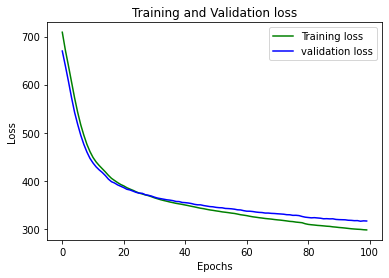

In [29]:
trainer.train(num_epochs=100, lr=0.0001)
output_layer_numpy, latent_layer_numpy, batch_effect_layer = trainer.predict(gene_expression_dataset.data, gene_expression_dataset.batch_indices)
latent_code = np.concatenate(latent_layer_numpy, axis=1)

---
#Extracting the updated expression matrix


In [30]:
output_layer_numpy, latent_layer_numpy, batch_effect_layer = trainer.predict(gene_expression_dataset.data, gene_expression_dataset.batch_indices)
latent_code = np.concatenate(latent_layer_numpy, axis=1)
oln1=output_layer_numpy[1]

In [31]:
adata_sc=adata.copy()
oln1 = np.array(oln1, dtype=float)
adata_sc.X = oln1

In [32]:
adata_sc1=adata_sc.copy()


----

#Quality check after scScope

In [33]:
a1=adata.copy()
a2=adata_sc1.copy()
sc.pp.calculate_qc_metrics(a1, percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(a2, percent_top=None, log1p=False, inplace=True)

... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


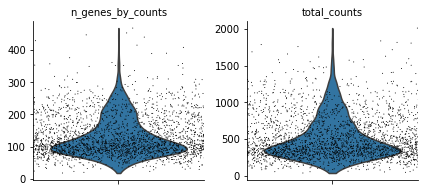

... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


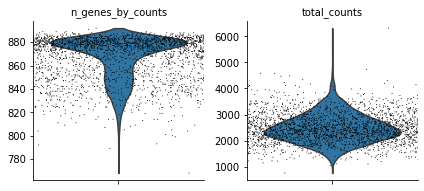

In [34]:
sc.pl.violin(a1, ['n_genes_by_counts', 'total_counts'],jitter=0.7, multi_panel=True)
sc.pl.violin(a2, ['n_genes_by_counts', 'total_counts'], jitter=0.7, multi_panel=True)

Visualizing cell counts and no. fo genes expressed before and after applying scScope

* Blue : before application of scScope
* Red  : after application of scScope

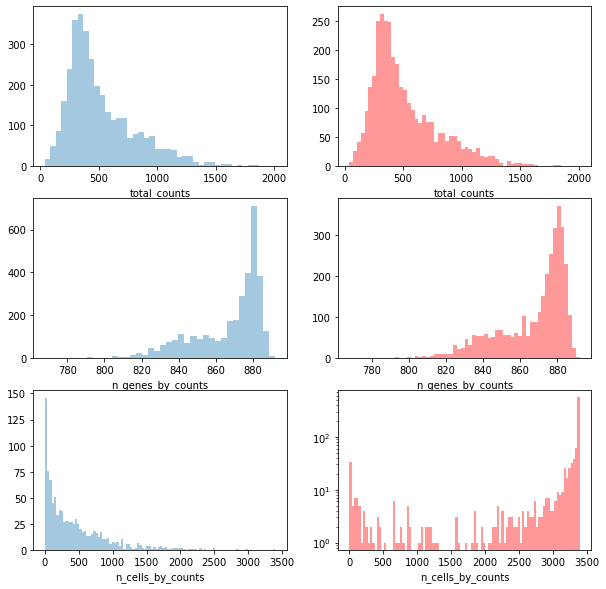

In [36]:
fig, axs = plt.subplots(3, 2, figsize=(10,10))
sns.distplot(a1.obs["total_counts"], kde=False, ax=axs[0,0])
sns.distplot(a1.obs["total_counts"], kde=False, bins=60, color= 'red', ax=axs[0,1])
sns.distplot(a2.obs["n_genes_by_counts"], kde=False, ax=axs[1,0])
sns.distplot(a2.obs["n_genes_by_counts"], kde=False, bins=60, color= 'red', ax=axs[1,1])
sns.distplot(a1.var["n_cells_by_counts"], kde=False,bins=100,  ax=axs[2,0])
plt.yscale('log') 
sns.distplot(a2.var["n_cells_by_counts"], kde=False, color= 'red',bins=100, ax=axs[2,1])
plt.yscale('log') 

#Principal Component analysis on datasets

... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


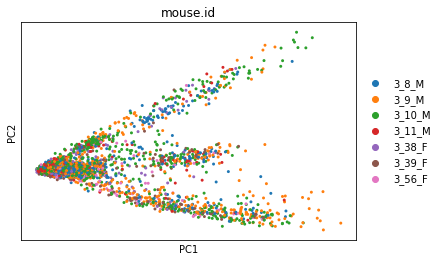

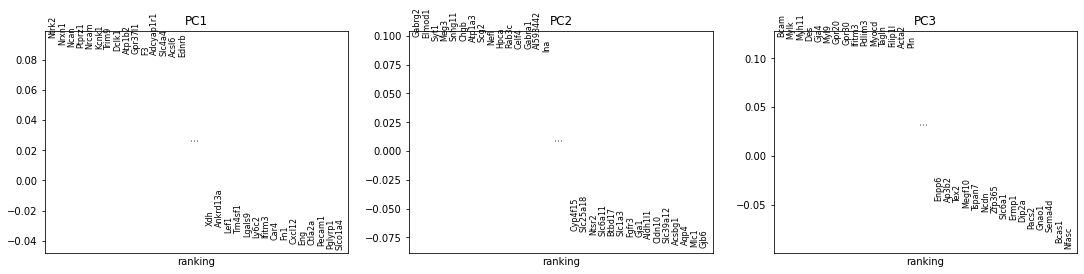

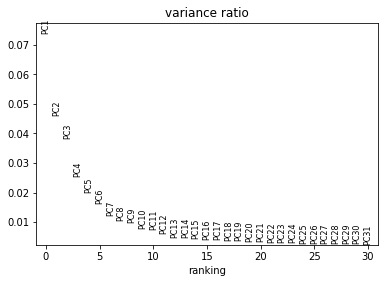

In [37]:
sc.pp.log1p(adata)#normalise
sc.pp.scale(adata)
sc.pp.pca(adata) 
sc.pl.pca_overview(adata, color='mouse.id')

... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


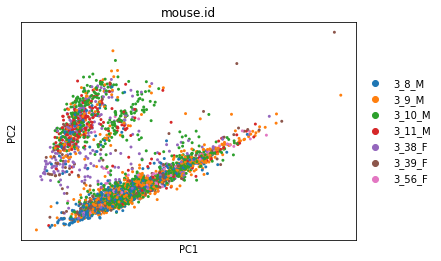

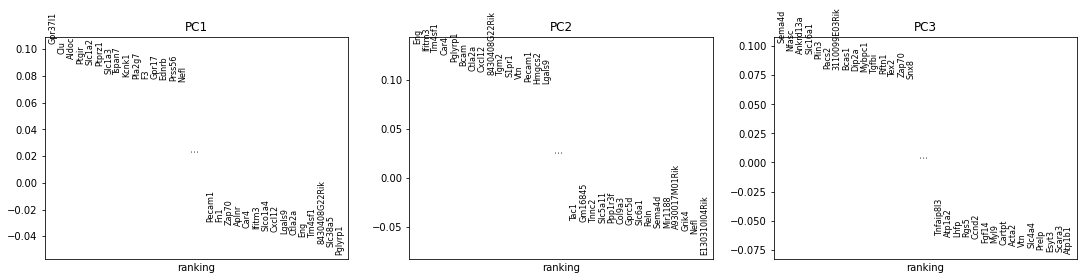

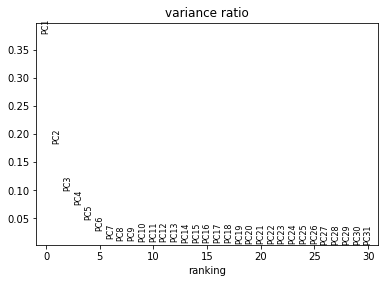

In [38]:
sc.pp.log1p(adata_sc)#normalise
sc.pp.scale(adata_sc)
sc.pp.pca(adata_sc1) 
sc.pl.pca_overview(adata_sc1, color='mouse.id')

#Dimensionality reduction

#1. tSNE
visualing the data using tSNE before and after the model

In [41]:
adata1=adata.copy()
adata2=adata_sc.copy()

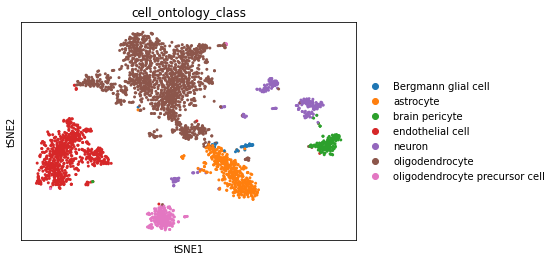

         Falling back to preprocessing with `sc.pp.pca` and default params.


... storing 'cell_ontology_class' as categorical
... storing 'subtissue' as categorical
... storing 'mouse.sex' as categorical
... storing 'mouse.id' as categorical
... storing 'plate.barcode' as categorical


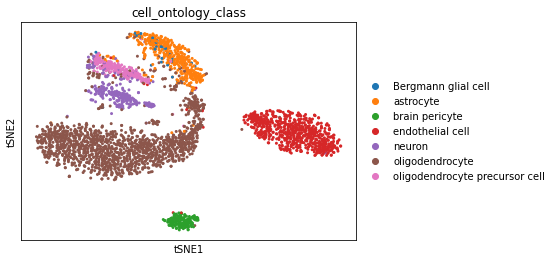

In [42]:
sc.tl.tsne(adata1, perplexity=30, learning_rate=1000, random_state=0)
sc.pl.tsne(adata1, color='cell_ontology_class')
sc.tl.tsne(adata2, perplexity=30, learning_rate=1000, random_state=0)
sc.pl.tsne(adata2, color='cell_ontology_class')

#2. UMAP
visualing the data using UMAP before and after the model

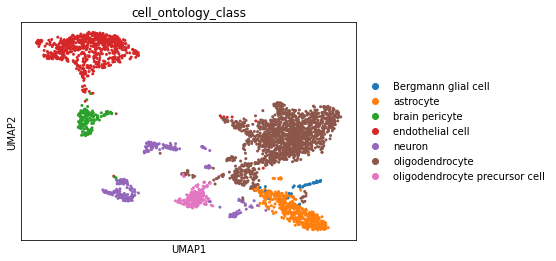

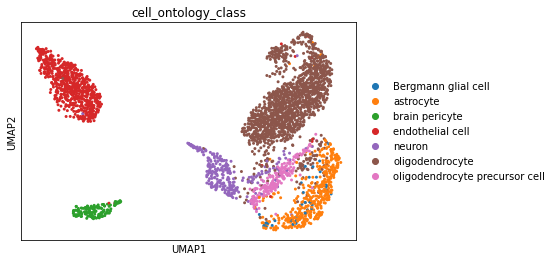

In [43]:
sc.pp.neighbors(adata)
sc.tl.umap(adata, min_dist=0.5, spread=1.0, random_state=1, n_components=2)

sc.pp.neighbors(adata_sc1)
sc.tl.umap(adata_sc1, min_dist=0.5, spread=1.0, random_state=1, n_components=2)

sc.pl.umap(adata, color='cell_ontology_class')
sc.pl.umap(adata_sc1, color='cell_ontology_class')

#CLustering Analysis - using K-means

... storing 'kmeans' as categorical


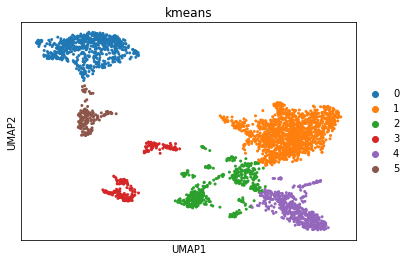

In [48]:
umap_coordinates = adata.obsm['X_umap'] 
kmeans = KMeans(n_clusters=6, random_state=0).fit(umap_coordinates) 

adata.obs['kmeans'] = kmeans.labels_ 
adata.obs['kmeans'] = adata.obs['kmeans'].astype(str)

sc.pl.umap(adata, color='kmeans') 

In [49]:
rand_index = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.8


... storing 'kmeans' as categorical


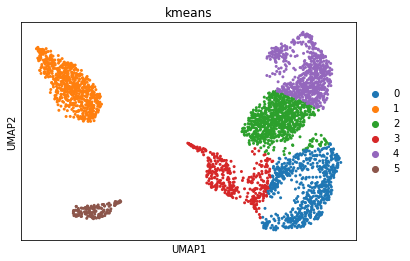

In [60]:
umap_coordinates = adata_sc1.obsm['X_umap'] 
kmeans = KMeans(n_clusters=6, random_state=0).fit(umap_coordinates) 

adata_sc1.obs['kmeans'] = kmeans.labels_ 
adata_sc1.obs['kmeans'] = adata_sc1.obs['kmeans'].astype(str)

sc.pl.umap(adata_sc1, color='kmeans') 

In [55]:
rand_index = adjusted_rand_score(labels_true = adata.obs['cell_ontology_class'], labels_pred = adata_sc1.obs['kmeans'])
print('The Rand index is', round(rand_index, 2))

The Rand index is 0.48


#Additional visualisations :

#1. TracksPlot

/usr/local/lib/python3.6/dist-packages/scanpy/tools/_rank_genes_groups.py:252: RuntimeWarning: invalid value encountered in log2
  rankings_gene_logfoldchanges.append(np.log2(foldchanges[global_indices]))


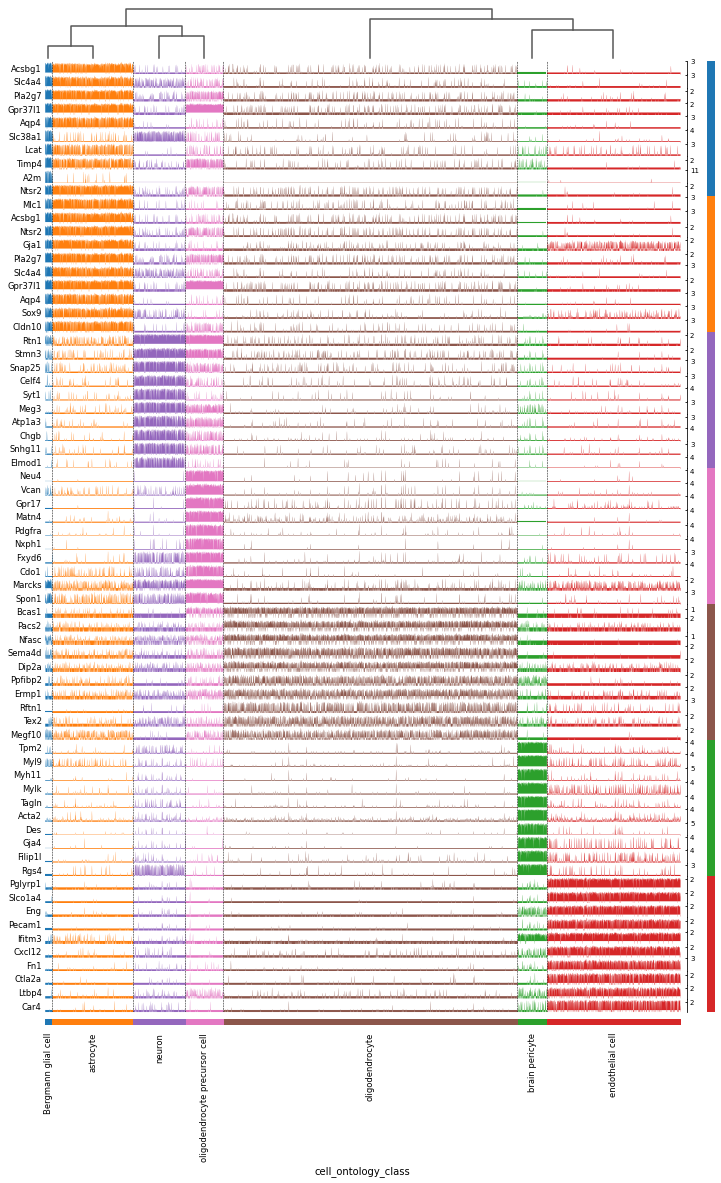

In [61]:
sc.tl.rank_genes_groups(adata, groupby='cell_ontology_class', use_raw=True, method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata, groupby='cell_ontology_class') # plot the result

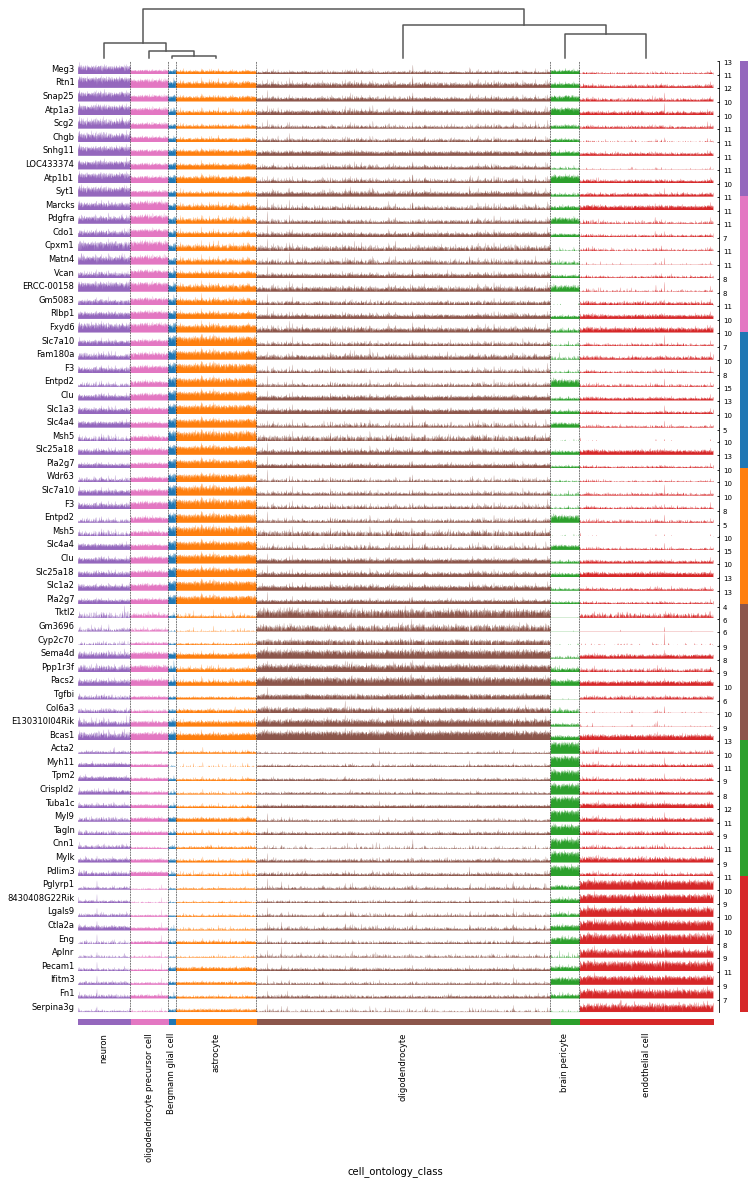

In [62]:
sc.tl.rank_genes_groups(adata_sc1, groupby='cell_ontology_class', use_raw=True, method='t-test_overestim_var', n_genes=10) # compute differential expression
sc.pl.rank_genes_groups_tracksplot(adata_sc1, groupby='cell_ontology_class') # plot the result

#2. Heatmaps

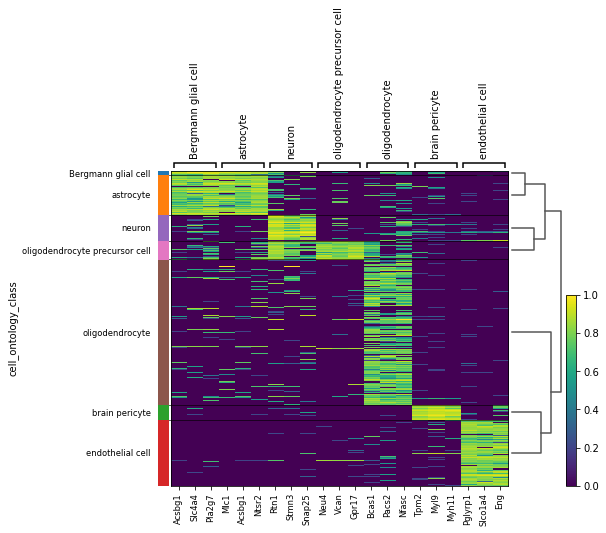

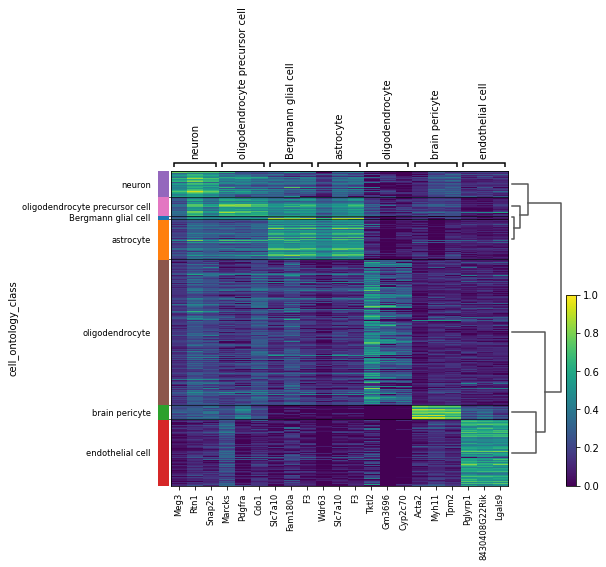

In [63]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=3, standard_scale='var')
sc.pl.rank_genes_groups_heatmap(adata_sc1, n_genes=3, standard_scale='var')

#Conclusions

The scScope model plays a good role in reeducing the noise in the data, however certain limitations exists like: quality and type of data highly affects the functioning of the model. To have an overall better result, we shall use this in combinantion with other models as this only reduces the noise in a data